<a href="https://colab.research.google.com/github/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/blob/main/relatorio_gasolina_etanol17_9_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Preços de Combustíveis no Brasil: Julho e agosto de 2023

Aqui vamos analisar os preços de gasolina e etanol no Brasil nos meses de junho de 2023 e Agosto de 2023. Queremos entender como esses preços mudaram nesse período e descobrir informações importantes sobre o mercado de combustíveis.

## Coleta de Dados

Primeiro, pegamos os dados do site oficial da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP). É de lá que vem toda a informação sobre preços de combustíveis no Brasil.

## O que Queremos Descobrir

Com essa análise, queremos mostrar como os preços de gasolina e etanol se comportaram nesses dois meses. Vamos também ver quais estados e cidades tinham os preços mais altos e mais baixos. Será que há alguma relação entre os preços e fatores como a região ou a bandeira do posto?

## Organização do Projeto

Para começar, limpamos e preparamos os dados para que possam ser analisados corretamente. Depois, fizemos uma análise exploratória detalhada, mostrando gráficos e respostas para cada uma das perguntas que tínhamos. Por fim, apresentamos nossas conclusões e o que isso pode significar para os consumidores e o mercado em geral.

Agora, vamos começar a nossa análise, olhando para os dados e respondendo às perguntas sobre o mercado de combustíveis no Brasil em Julho e agosto de 2023.

# Quais Problemas Vamos Resolver?

Nesta análise, estamos de olho em algumas questões importantes:

1. **Como os Preços dos Combustíveis Se Comportaram?**
   - Queremos saber se o preço da gasolina e do etanol subiu ou desceu nos últimos dois meses.

2. **Qual o Preço Médio da Gasolina e do Etanol?**
   - Vamos descobrir quanto custam, em média, a gasolina e o etanol nesse período.

3. **Quais Estados Têm os Combustíveis Mais Caros?**
   - Identificaremos os 5 estados onde a gasolina e o etanol são mais caros, em média.

4. **Preços Médios por Estado?**
   - Verificaremos quanto custa a gasolina e o etanol, em média, em cada estado.

5. **Os Locais Mais Baratos e Mais Caros?**
   - Encontraremos o município com o preço mais baixo e mais alto para a gasolina e o etanol.

6. **Região com a Gasolina Mais Cara?**
   - Descobriremos em qual região a gasolina tem o maior preço médio.

7. **Região com o Etanol Mais Barato?**
   - Encontraremos a região onde o etanol tem o menor preço médio.

8. **Correlações Importantes?**
   - Investigaremos se existe alguma relação entre o preço dos combustíveis e a região de venda ou a bandeira do posto.

(Perguntas Adicionais)

9. **Quem Dominam os Postos de Combustível?**
   - Avaliaremos a proporção de postos de bandeira branca, grandes marcas e pequenas marcas em cada região, e se isso afeta os preços.

10. **Estados com Maiores Aumentos no Preço do Etanol?**
    - Identificaremos os estados que tiveram os maiores aumentos percentuais no preço do etanol nos últimos dois meses.

11. **Qual Bandeira é a Mais Comum?**
    - Descobriremos qual bandeira de combustível é a mais presente no mercado.

Vamos mergulhar nos dados e buscar respostas para essas questões!

In [1]:
# Etapa 2: Coleta e Análise Inicial dos Dados

## Para começar, precisamos reunir os dados e ter nosso primeiro contato com eles. Vamos entender as características que definem esses dados e como estão estruturados.

## 2.1. Importação das Bibliotecas Necessárias

### Primeiro, vamos importar as ferramentas que iremos usar:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# 2.2. Coleta dos Dados para Análise
### Agora, vamos obter os dados que precisamos analisar. Vamos pegar os arquivos .csv disponíveis no site do gov.br. Vamos usar os dados de julho e agosto para Etanol Hidratado e Gasolina Comum. Vamos combiná-los em um único conjunto de dados para uma análise abrangente e eficaz.

In [8]:
# Importando os dados de julho
combustiveis_julho = pd.read_csv("/content/precos-gasolina-etanol-07.csv", sep=(";"))
# Importando os dados de agosto
combustiveis_agosto = pd.read_csv("/content/precos-gasolina-etanol-08.csv", sep=(";"))

# Concatenando os dados
combustiveis = pd.concat([combustiveis_julho, combustiveis_agosto,], ignore_index=True)

FileNotFoundError: ignored

## 2.3. Conhecendo os Dados
### Abaixo teremos o primeiro contato com o DataSet, mostrando as 5 primeiras e 5 últimas linhas, onde podemos observar de maneira geral como é o DataSet coletado.

In [ ]:
#Verificando dimensão do DataSet
combustiveis.shape

(110485, 16)

### Com essa checagem, podemos verificar que nosso DataSet contém **107.531 linhas/registros** por **16 colunas/variáveis**.

##### <font color = red>**2.3.2. Checando valores nulos (NaN)**

In [ ]:
dados_nulos_qntd = combustiveis.isnull().sum()
dados_nulos_porc = ((combustiveis.isnull().sum() / combustiveis.shape[0]) * 100).round(1)
dados_nulos = pd.DataFrame({
    'Frequência': dados_nulos_qntd,
    'Porcentagem (%)': dados_nulos_porc
})
dados_nulos.rename_axis('Coluna/Váriavel', axis='columns', inplace=True)
dados_nulos


Coluna/Váriavel,Frequência,Porcentagem (%)
Regiao - Sigla,0,0.0
Estado - Sigla,0,0.0
Municipio,0,0.0
Revenda,0,0.0
CNPJ da Revenda,0,0.0
Nome da Rua,0,0.0
Numero Rua,26,0.0
Complemento,86058,77.9
Bairro,237,0.2
Cep,0,0.0


### Verificando os valores nulos podemos perceber que a coluna **"Valor de Compra" tem 100% de valores nulos**, e a coluna **"Complemento" com mais de 77% de valores ausentes**. Com esse número elevado de valores nulos, essas colunas não serão úteis para nossa análise, com isso, podemos retirar elas do nosso DataSet, faremos isso logo mais abaixo.

##### <font color = red>**2.3.3. Dicionário de Colunas/Variáveis**

In [ ]:
#Verificando combustiveis
combustiveis.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

### Ao verificar as colunas do DataSet, podemos fazer um dicionário para dar um significado mais amplo para elas e então saberemos exatamente o que é cada váriavel.

- `Regiao - Sigla` - Sigla da Região.
- `Estado - Sigla` - Sigla da Unidade Federativa (UF).
- `Municipio` - Nome do município.
- `Revenda` - Nome do estabelecimento.
- `CNPJ da Revenda` - Número do Cadastro Nacional de Pessoa Jurídica.
- `Nome da Rua` - Nome do logradouro.
- `Numero da Rua` - Número do logradouro.
- `Complemento` - Complemento do logradouro.
- `Bairro` - Nome do bairro.
- `Cep` - Número do Código do Endereço Postal (CEP) do logradouro.
- `Produto` - Nome do combustível pesquisado.
- `Data da Coleta` - Data da coleta do(s) preço(s).
- `Valor de Venda` - Preço de venda ao consumidor final praticado pelo revendedor, na data da coleta.
- `Valor de Compra` - Preço de distribuição (preço de venda da distribuidora para o posto revendedor de combustível)**.
- `Unidade de Medida` - Unidade de Medida.
- `Bandeira` - Nome da Bandeira da revenda.

##### <font color = red>**2.3.4. Verificando os tipos de dados**

In [ ]:
#Verificar tipos de dados
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110485 entries, 0 to 110484
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     110485 non-null  object 
 1   Estado - Sigla     110485 non-null  object 
 2   Municipio          110485 non-null  object 
 3   Revenda            110485 non-null  object 
 4   CNPJ da Revenda    110485 non-null  object 
 5   Nome da Rua        110485 non-null  object 
 6   Numero Rua         110459 non-null  object 
 7   Complemento        24427 non-null   object 
 8   Bairro             110248 non-null  object 
 9   Cep                110485 non-null  object 
 10  Produto            110485 non-null  object 
 11  Data da Coleta     110485 non-null  object 
 12  Valor de Venda     110485 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  110485 non-null  object 
 15  Bandeira           110485 non-null  object 
dtypes:

### Verificando os tipos de dados que nosso DataSet tem, podemos perceber que há alguns problemas: A váriavel **"Valor de Venda"** e **"Data Coleta"** está como do tipo "Object". Isso dificultaria uma análise em cima desses dados pois não estão do tipo de dado correto. Faremos essa correção logo abaixo.

##### <font color = red>**2.3.5 Verificando valores únicos**

In [ ]:
#Verificar valores unicos
combustiveis.nunique()

Regiao - Sigla          5
Estado - Sigla         27
Municipio             460
Revenda              6945
CNPJ da Revenda      7833
Nome da Rua          5306
Numero Rua           3118
Complemento          1345
Bairro               3703
Cep                  6065
Produto                 3
Data da Coleta         44
Valor de Venda        445
Valor de Compra         0
Unidade de Medida       1
Bandeira               46
dtype: int64

### Apenas verificando os valores únicos do nosso DataSet, podemos tirar algumas informações importantes. Existem **7833 CNPJ cadastrados**, com isso percebemos que uma empresa pode ter um ou mais postos cadastrados nesse banco de dados, além de **46 Bandeiras diferentes** de distribuidor.

In [ ]:
## **<font color ='red' size=5>3. Tratamento do Dados</font>**

#####  **<font color ='green' size=5>3.1. Vamos verificar a porcentagem de dados ausentes em cada coluna.</font>**

In [ ]:
(((combustiveis.isnull().sum() / combustiveis.shape[0]) * 100).sort_values(ascending=False)).round(2)

Valor de Compra      100.00
Complemento           77.89
Bairro                 0.21
Numero Rua             0.02
Regiao - Sigla         0.00
Estado - Sigla         0.00
Municipio              0.00
Revenda                0.00
CNPJ da Revenda        0.00
Nome da Rua            0.00
Cep                    0.00
Produto                0.00
Data da Coleta         0.00
Valor de Venda         0.00
Unidade de Medida      0.00
Bandeira               0.00
dtype: float64

Podemos reparar que duas colunas se sobressaem, sendo elas a coluna de `Valor de Compra` que possui **_100% dos seus valores nulos_**, e a coluna `Complemento` que possui cerca de **_77% de seus valores nulos._**

A partir disso, precisamos abordar certas mudanças em algumas das colunas durante o processo de limpeza do DataSet. Sendo elas:

- Resetar o index do DataFrame concatenado;

- Retirar a coluna `Valor de Compra`, pois a mesma é composta apenas por **_valores NaN;_**
- Alterar o Dtype da coluna `Valor de Venda` de **_str_** para **_float64_**, para podermos realizar operações e análises a partir dela;
- Retirar a coluna `Complemento`, pois não usaremos para nossa análise.
- Alterar o Dtype da coluna `Data da Coleta` de str para DateTime, para podermos realizar filtragens e pesquisas a partir das datas;


Com esse tratamento dos dados, poderemos aprofundar mais nossa análise exploratória e compreender ainda melhor o nosso DataSet.

### <font color = red>**3.2. Tratamento dos dados**

###- Resetando o Index no DataFrame concatenado:

In [ ]:
combustiveis.reset_index(0,drop=True,inplace = True)

###- Retirar a coluna valor de compra, pois tem 100% dos valores nulos,preencher a coluna complemento com 0 e mudar o tipo da coluna valor de venda de object para float64

In [ ]:
combustiveis.drop('Valor de Compra',axis=1,inplace=True)

###- Transformando valores da Coluna 'Valor de Venda' para float64

In [ ]:
combustiveis['Valor de Venda'] = combustiveis['Valor de Venda'].str.replace(',', '.').astype(float)

### - Removendo a coluna "Complemento"

In [ ]:
combustiveis.drop('Complemento', axis=1, inplace=True)

### - Alterando o tipo de dado da coluna 'Data da Coleta' para datetime

In [ ]:
combustiveis['Data da Coleta'] = pd.to_datetime(combustiveis['Data da Coleta'], dayfirst=True)

### - Após realizarmos a limpeza e tratamento dos dados vamos conferir como está  nosso dataframe

In [ ]:
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110485 entries, 0 to 110484
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     110485 non-null  object        
 1   Estado - Sigla     110485 non-null  object        
 2   Municipio          110485 non-null  object        
 3   Revenda            110485 non-null  object        
 4   CNPJ da Revenda    110485 non-null  object        
 5   Nome da Rua        110485 non-null  object        
 6   Numero Rua         110459 non-null  object        
 7   Bairro             110248 non-null  object        
 8   Cep                110485 non-null  object        
 9   Produto            110485 non-null  object        
 10  Data da Coleta     110485 non-null  datetime64[ns]
 11  Valor de Venda     110485 non-null  float64       
 12  Unidade de Medida  110485 non-null  object        
 13  Bandeira           110485 non-null  object  

### Como podemos ver, nossas mudanças foram realizadas com sucesso, agora temos os tipos de dados corretos para as colunas apropriadas.

Vamos visualizar os 5 registros iniciais do DataFrame:

In [ ]:
combustiveis.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,GASOLINA,2023-07-03,4.87,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,ETANOL,2023-07-03,3.27,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,25 DE AGOSTO,69980-000,GASOLINA,2023-07-03,6.95,R$ / litro,VIBRA ENERGIA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA,2023-07-03,6.93,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA ADITIVADA,2023-07-03,6.99,R$ / litro,IPIRANGA


### <font color = blue>**3.3 Checando outliers**

#### <font color = green>**3.3.1 Resumo estatístico dos valores com o método describe**

In [ ]:
combustiveis['Valor de Venda'].describe().round(3)

count    110485.000
mean          5.182
std           0.933
min           2.750
25%           4.490
50%           5.490
75%           5.880
max           8.940
Name: Valor de Venda, dtype: float64

#### <font color = blue>**3.3.2 Separando o dataframe principal em dataframes por mês**

In [ ]:
combustiveis['Data da Coleta'] = pd.to_datetime(combustiveis['Data da Coleta'], format='%d/%m/%Y')


# Filtrar as datas para o mês de julho
julho = combustiveis[combustiveis['Data da Coleta'].dt.month == 7]
# Filtrar as datas para o mês de agosto
agosto = combustiveis[combustiveis['Data da Coleta'].dt.month == 8]

#### <font color = blue>**3.3.3 Criando dataframes específicos para cada combustível**

###- **Etanol**

In [ ]:
etanol = combustiveis[(combustiveis['Produto'] == 'ETANOL') ]

etanol

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,ETANOL,2023-07-03,3.27,R$ / litro,BRANCA
5,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,ETANOL,2023-07-03,5.49,R$ / litro,IPIRANGA
8,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,PLANALTO,57308-000,ETANOL,2023-07-03,4.78,R$ / litro,VIBRA ENERGIA
11,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,CANAFISTULA,57302-802,ETANOL,2023-07-03,4.69,R$ / litro,BRANCA
14,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0002-39,"AVENIDA EMIDIO DE LIMA,",23,JARDIM ESPERANCA,57304-820,ETANOL,2023-07-03,4.99,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110471,S,PR,CASCAVEL,AUTO POSTO PRA FRENTE BRASIL LTDA,04.868.412/0010-90,RUA RIO GRANDE DO SUL,2160,CENTRO,85801-011,ETANOL,2023-08-31,3.89,R$ / litro,IPIRANGA
110473,SE,SP,MIRASSOL,AUTO POSTO VALE DO SOL MIRASSOL LTDA,35.395.412/0001-52,AVENIDA LIONS CLUBE,31564,JARDIM RENASCENCA,15130-740,ETANOL,2023-08-31,3.49,R$ / litro,ALESAT
110476,NE,BA,SIMOES FILHO,DERIVADOS DE PETROLEO SIMOES FILHO LTDA,32.954.843/0001-13,AVENIDA ENG. ELMO SEREJO DE FARIAS,2797,CIA I,43700-000,ETANOL,2023-08-31,4.79,R$ / litro,PETROBAHIA
110479,NE,BA,SIMOES FILHO,COMERCIO DE COMBUSTIVEIS QUERIDO LTDA,31.744.119/0001-00,AVENIDA ENG. ELMO SEREJO DE FARIAS,2426,CIA I,43700-000,ETANOL,2023-08-31,4.22,R$ / litro,BRANCA


###- **Gasolina**

In [ ]:
gasolina = combustiveis[(combustiveis['Produto'] == 'GASOLINA') ]
gasolina

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,GASOLINA,2023-07-03,4.87,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,25 DE AGOSTO,69980-000,GASOLINA,2023-07-03,6.95,R$ / litro,VIBRA ENERGIA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA,2023-07-03,6.93,R$ / litro,IPIRANGA
6,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,PLANALTO,57308-000,GASOLINA,2023-07-03,5.98,R$ / litro,VIBRA ENERGIA
9,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,CANAFISTULA,57302-802,GASOLINA,2023-07-03,5.79,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110472,SE,SP,MIRASSOL,AUTO POSTO VALE DO SOL MIRASSOL LTDA,35.395.412/0001-52,AVENIDA LIONS CLUBE,31564,JARDIM RENASCENCA,15130-740,GASOLINA,2023-08-31,5.89,R$ / litro,ALESAT
110474,NE,BA,SIMOES FILHO,DERIVADOS DE PETROLEO SIMOES FILHO LTDA,32.954.843/0001-13,AVENIDA ENG. ELMO SEREJO DE FARIAS,2797,CIA I,43700-000,GASOLINA,2023-08-31,5.99,R$ / litro,PETROBAHIA
110477,NE,BA,SIMOES FILHO,COMERCIO DE COMBUSTIVEIS QUERIDO LTDA,31.744.119/0001-00,AVENIDA ENG. ELMO SEREJO DE FARIAS,2426,CIA I,43700-000,GASOLINA,2023-08-31,5.92,R$ / litro,BRANCA
110480,S,SC,ARARANGUA,RIZZOTTO & CIA LTDA,05.298.376/0010-39,RUA PEDRO JOAO PEREIRA,574,MATO ALTO,88904-174,GASOLINA,2023-08-31,5.59,R$ / litro,IPIRANGA


###- **Gasolina Aditivada**

In [ ]:
gasolina_aditivada = combustiveis[(combustiveis['Produto'] == 'GASOLINA ADITIVADA') ]
gasolina_aditivada

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA ADITIVADA,2023-07-03,6.99,R$ / litro,IPIRANGA
7,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,PLANALTO,57308-000,GASOLINA ADITIVADA,2023-07-03,5.98,R$ / litro,VIBRA ENERGIA
10,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,CANAFISTULA,57302-802,GASOLINA ADITIVADA,2023-07-03,5.99,R$ / litro,BRANCA
13,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0002-39,"AVENIDA EMIDIO DE LIMA,",23,JARDIM ESPERANCA,57304-820,GASOLINA ADITIVADA,2023-07-03,6.09,R$ / litro,IPIRANGA
16,NE,AL,DELMIRO GOUVEIA,GILVAN MARTINS DE SOUZA,04.890.249/0002-51,RODOVIA MANOEL RIBEIRO,475,BOM SOSSEGO,57480-000,GASOLINA ADITIVADA,2023-07-03,6.25,R$ / litro,DISLUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110470,S,PR,CASCAVEL,AUTO POSTO PRA FRENTE BRASIL LTDA,04.868.412/0010-90,RUA RIO GRANDE DO SUL,2160,CENTRO,85801-011,GASOLINA ADITIVADA,2023-08-31,6.19,R$ / litro,IPIRANGA
110475,NE,BA,SIMOES FILHO,DERIVADOS DE PETROLEO SIMOES FILHO LTDA,32.954.843/0001-13,AVENIDA ENG. ELMO SEREJO DE FARIAS,2797,CIA I,43700-000,GASOLINA ADITIVADA,2023-08-31,5.99,R$ / litro,PETROBAHIA
110478,NE,BA,SIMOES FILHO,COMERCIO DE COMBUSTIVEIS QUERIDO LTDA,31.744.119/0001-00,AVENIDA ENG. ELMO SEREJO DE FARIAS,2426,CIA I,43700-000,GASOLINA ADITIVADA,2023-08-31,5.92,R$ / litro,BRANCA
110481,S,SC,ARARANGUA,RIZZOTTO & CIA LTDA,05.298.376/0010-39,RUA PEDRO JOAO PEREIRA,574,MATO ALTO,88904-174,GASOLINA ADITIVADA,2023-08-31,5.79,R$ / litro,IPIRANGA


### <font color = red>**3.4 Calculo do limites de outlier**
#### <font color = green>**3.4.1 Definindo um range para os outliers utilizando a Regra 1.5 IQR (Interquartile Range): Valores que estão abaixo de Q1 - 1.5 * IQR ou acima de Q3 + 1.5 * IQR, onde Q1 é o primeiro quartil e Q3 é o terceiro quartil.**

In [ ]:
# Definindo os quartis para o etanol
primeiro_quartil_etanol = etanol['Valor de Venda'].describe().loc['25%']
terceiro_quartil_etanol = etanol['Valor de Venda'].describe().loc['75%']


# Definindo os quartis para a gasolina
primeiro_quartil_gasolina = gasolina['Valor de Venda'].describe().loc['25%']
terceiro_quartil_gasolina = gasolina['Valor de Venda'].describe().loc['75%']

# Definindo os quartis para o gasolina aditivada
primeiro_quartil_aditivada = gasolina_aditivada['Valor de Venda'].describe().loc['25%']
terceiro_quartil_aditivada = gasolina_aditivada['Valor de Venda'].describe().loc['75%']

dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Primeiro Quartil': [primeiro_quartil_etanol, primeiro_quartil_gasolina, primeiro_quartil_aditivada],
    'Terceiro Quartil': [terceiro_quartil_etanol, terceiro_quartil_gasolina, terceiro_quartil_aditivada]
}

# Criar o DataFrame
df_quartis = pd.DataFrame(dados)

df_quartis


,Combustível,Primeiro Quartil,Terceiro Quartil
0,Etanol,3.56,4.48
1,Gasolina,5.39,5.89
2,Gasolina Aditivada,5.59,6.09


#### <font color = red>**3.4.2 Definimos os limites inferiores e superioes de outliers**

In [ ]:
#Calculando o IQR e os limites para detecção de outliers

# IQR = Q3 - Q1

#Etanol
IQR_etanol = terceiro_quartil_etanol - primeiro_quartil_etanol


limite_outlier_inferior_etanol = (primeiro_quartil_etanol - (1.5 * IQR_etanol)).round(3)
limite_outlier_superior_etanol = (terceiro_quartil_etanol + (1.5 * IQR_etanol)).round(3)

#Gasolina
IQR_gasolina = terceiro_quartil_gasolina - primeiro_quartil_gasolina

limite_outlier_inferior_gasolina = (primeiro_quartil_gasolina - (1.5 * IQR_gasolina)).round(3)
limite_outlier_superior_gasolina = (terceiro_quartil_gasolina + (1.5 * IQR_gasolina)).round(3)

#Gasolina Aditivada
IQR_gasolina_aditivada = terceiro_quartil_aditivada - primeiro_quartil_aditivada

limite_outlier_inferior_aditivada = (primeiro_quartil_aditivada - (1.5 * IQR_gasolina_aditivada)).round(3)
limite_outlier_superior_aditivada = (terceiro_quartil_aditivada + (1.5 * IQR_gasolina_aditivada)).round(3)



dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'IQR': [IQR_etanol, IQR_gasolina, IQR_gasolina_aditivada],
    'Limite Inferior': [limite_outlier_inferior_etanol, limite_outlier_inferior_gasolina, limite_outlier_inferior_aditivada],
    'Limite Superior': [limite_outlier_superior_etanol, limite_outlier_superior_gasolina, limite_outlier_superior_aditivada]
}

df_intervalos_outlier = pd.DataFrame(dados)

df_intervalos_outlier

,Combustível,IQR,Limite Inferior,Limite Superior
0,Etanol,0.92,2.18,5.86
1,Gasolina,0.50,4.64,6.64
2,Gasolina Aditivada,0.50,4.84,6.84


###- **Quantidade de  outlier abaixo dos limites definidos**

In [ ]:
# Etanol
outliers_abaixo_etanol = etanol['Valor de Venda'] < limite_outlier_inferior_etanol
quantidade_outliers_abaixo_etanol = outliers_abaixo_etanol.sum()


# Gasolina
outliers_abaixo_gasolina = gasolina['Valor de Venda'] < limite_outlier_inferior_gasolina
quantidade_outliers_abaixo_gasolina = outliers_abaixo_gasolina.sum()


# Gasolina Aditivada
outliers_abaixo_aditivada = gasolina_aditivada['Valor de Venda'] < limite_outlier_inferior_aditivada
quantidade_outliers_abaixo_aditivada = outliers_abaixo_aditivada.sum()

dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Outliers Abaixo': [quantidade_outliers_abaixo_etanol, quantidade_outliers_abaixo_gasolina, quantidade_outliers_abaixo_aditivada]
}

# Criar o DataFrame
df_quantidade_outliers = pd.DataFrame(dados)

df_quantidade_outliers

,Combustível,Outliers Abaixo
0,Etanol,0
1,Gasolina,12
2,Gasolina Aditivada,26


###- **Quantidade de outlier acima dos limites definidos**

In [ ]:
# Calcular a quantidade de outliers acima para o etanol
outliers_acima_etanol = etanol['Valor de Venda'] > limite_outlier_superior_etanol
quantidade_outliers_acima_etanol = outliers_acima_etanol.sum()

# Calcular a quantidade de outliers acima para a gasolina
outliers_acima_gasolina = gasolina['Valor de Venda'] > limite_outlier_superior_gasolina
quantidade_outliers_acima_gasolina = outliers_acima_gasolina.sum()

# Calcular a quantidade de outliers acima para a gasolina aditivada
outliers_acima_aditivada = gasolina_aditivada['Valor de Venda'] > limite_outlier_superior_aditivada
quantidade_outliers_acima_aditivada = outliers_acima_aditivada.sum()

# Dados
dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Quantidade de Outliers Acima': [quantidade_outliers_acima_etanol, quantidade_outliers_acima_gasolina, quantidade_outliers_acima_aditivada]
}

# Criar o DataFrame
df_quantidade_outliers_acima = pd.DataFrame(dados)

df_quantidade_outliers_acima

,Combustível,Quantidade de Outliers Acima
0,Etanol,93
1,Gasolina,556
2,Gasolina Aditivada,450


###- Podemos perceber que temos poucos valores abaixo dos limites, em contrapartida temos varios registros acima dos limites, Vamos calcular a porcentagem que esses valores representam para o dataframe

In [ ]:
# Porcentagem de outliers acima e abaixo da média para cada combustível

# Etanol
porcentagem_acima_etanol = (quantidade_outliers_acima_etanol / len(etanol)) * 100
porcentagem_abaixo_etanol = (quantidade_outliers_abaixo_etanol / len(etanol)) * 100

# Gasolina
porcentagem_acima_gasolina = (quantidade_outliers_acima_gasolina / len(gasolina)) * 100
porcentagem_abaixo_gasolina = (quantidade_outliers_abaixo_gasolina / len(gasolina)) * 100

# Gasolina Aditivada
porcentagem_acima_aditivada = (quantidade_outliers_acima_aditivada / len(gasolina_aditivada)) * 100
porcentagem_abaixo_aditivada = (quantidade_outliers_abaixo_aditivada / len(gasolina_aditivada)) * 100

# Dados
dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Porcentagem de Outliers Acima (%)': [porcentagem_acima_etanol, porcentagem_acima_gasolina, porcentagem_acima_aditivada],
    'Porcentagem de Outliers Abaixo (%)': [porcentagem_abaixo_etanol, porcentagem_abaixo_gasolina, porcentagem_abaixo_aditivada]
}

# Criar o DataFrame
df_porcentagem_outliers = pd.DataFrame(dados)

df_porcentagem_outliers.round(2)

,Combustível,Porcentagem de Outliers Acima (%),Porcentagem de Outliers Abaixo (%)
0,Etanol,0.26,0.00
1,Gasolina,1.32,0.03
2,Gasolina Aditivada,1.37,0.08


###- **Os outliers representam pequenas porcentagens quando comparados aos seus dataframes, Vamos calcular a interferência que esse valores causam nos nosso dados, usaremos a `Gasolina` como exemplo por possuir a maior porcentagem**

In [ ]:
# Filtrar os dados da gasolina sem os outliers
gasolina_sem_outliers = gasolina[(gasolina['Valor de Venda'] >= limite_outlier_inferior_gasolina) & (gasolina['Valor de Venda'] <= limite_outlier_superior_gasolina)]

# Calcular o describe da gasolina com os outliers
describe_gasolina_com_outliers = gasolina['Valor de Venda'].describe().round(2)

# Calcular o describe da gasolina sem os outliers
describe_gasolina_sem_outliers = gasolina_sem_outliers['Valor de Venda'].describe().round(2)

dados = {
    'Métrica': ['Contagem', 'Média', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo'],
    'Com Outliers': [describe_gasolina_com_outliers['count'], describe_gasolina_com_outliers['mean'], describe_gasolina_com_outliers['std'],
                     describe_gasolina_com_outliers['min'], describe_gasolina_com_outliers['25%'], describe_gasolina_com_outliers['50%'],
                     describe_gasolina_com_outliers['75%'], describe_gasolina_com_outliers['max']],
    'Sem Outliers': [describe_gasolina_sem_outliers['count'], describe_gasolina_sem_outliers['mean'], describe_gasolina_sem_outliers['std'],
                     describe_gasolina_sem_outliers['min'], describe_gasolina_sem_outliers['25%'], describe_gasolina_sem_outliers['50%'],
                     describe_gasolina_sem_outliers['75%'], describe_gasolina_sem_outliers['max']]
}

df_comparacao = pd.DataFrame(dados)

df_comparacao

,Métrica,Com Outliers,Sem Outliers
0,Contagem,42091.00,41523.00
1,Média,5.66,5.64
2,Desvio Padrão,0.39,0.37
3,Mínimo,4.49,4.65
4,25%,5.39,5.39
5,50%,5.65,5.64
6,75%,5.89,5.89
7,Máximo,7.62,6.64


###- **Podemos ver que os valores não mudam muito, Vamos calcular em porcentagem quanto os outliers interferem na nossa média**

In [ ]:
# Média da gasolina com outliers
media_com_outliers = describe_gasolina_com_outliers['mean']

# Média da gasolina sem outliers
media_sem_outliers = describe_gasolina_sem_outliers['mean']

# Calcular a diferença percentual
porcentagem_interferencia = ((media_com_outliers - media_sem_outliers) / media_sem_outliers) * 100

print(f"A presença dos outliers interfere nos valores em {porcentagem_interferencia:.2f}%")

A presença dos outliers interfere nos valores em 0.35%


###- **Após os calculos de outliers indetificamos que a quantidade de outliers para cada combustivel representa uma pequna porcentagem do total de resgistros, a presença dos outliers representa uma alteração de 0,45% nas metricas da gasolina, o que não vai interferir significativamente nos nossos calculos.</font>**

In [ ]:
outliers_acima_etanol = etanol['Valor de Venda']>limite_outlier_superior_etanol
quantidade_outliers_acima_etanol=outliers_acima_etanol.sum()
quantidade_outliers_acima_etanol

93

###- **Vamos usar um boxplot para uma visualização melhor.**

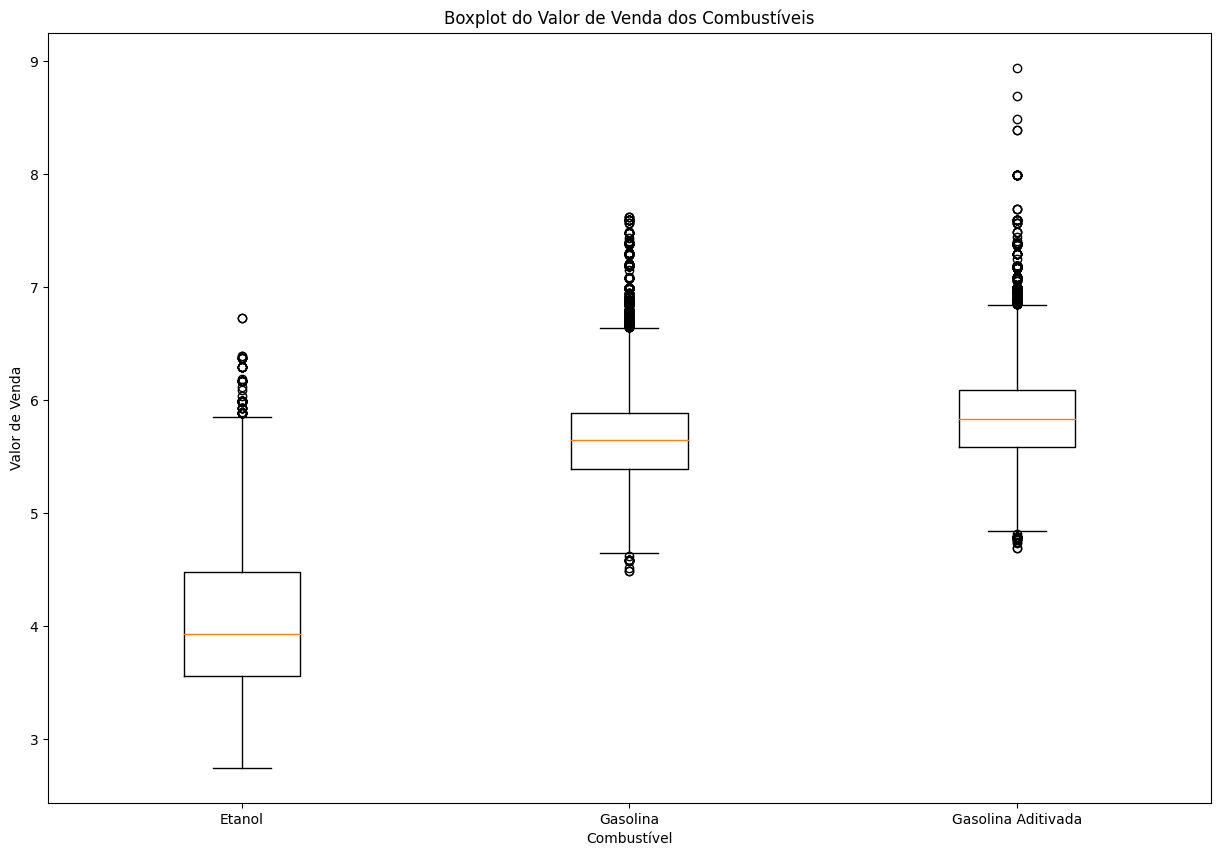

In [ ]:

# Dados
dados = [etanol['Valor de Venda'], gasolina['Valor de Venda'], gasolina_aditivada['Valor de Venda']]
nomes_combustiveis = ['Etanol', 'Gasolina', 'Gasolina Aditivada']

# Tamanho da figura
plt.figure(figsize=(15, 10))

# Criação do boxplot com outliers
plt.boxplot(dados, vert=True, labels=nomes_combustiveis, showfliers=True)  # vert=False para um boxplot horizontal

# Título e rótulos
plt.title('Boxplot do Valor de Venda dos Combustíveis')
plt.xlabel('Combustível')
plt.ylabel('Valor de Venda')

# Mostrar o gráfico
plt.show()

###- Para confirmar, podemos ver que `99% ` dos valores da gasolina estão proximos ao limite superior do outlier

In [ ]:
quantile = gasolina['Valor de Venda'].quantile(.99)
dados ={
    'Combustível': 'Gasolina',
    '99%': quantile,
    'limite superior': limite_outlier_superior_gasolina,
}
df_quantile_limite = pd.DataFrame(dados, index=[0])
df_quantile_limite

,Combustível,99%,limite superior
0,Gasolina,6.79,6.64


### <font color = red>**Respondendo as Perguntas**

### <font color = red>**1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?**

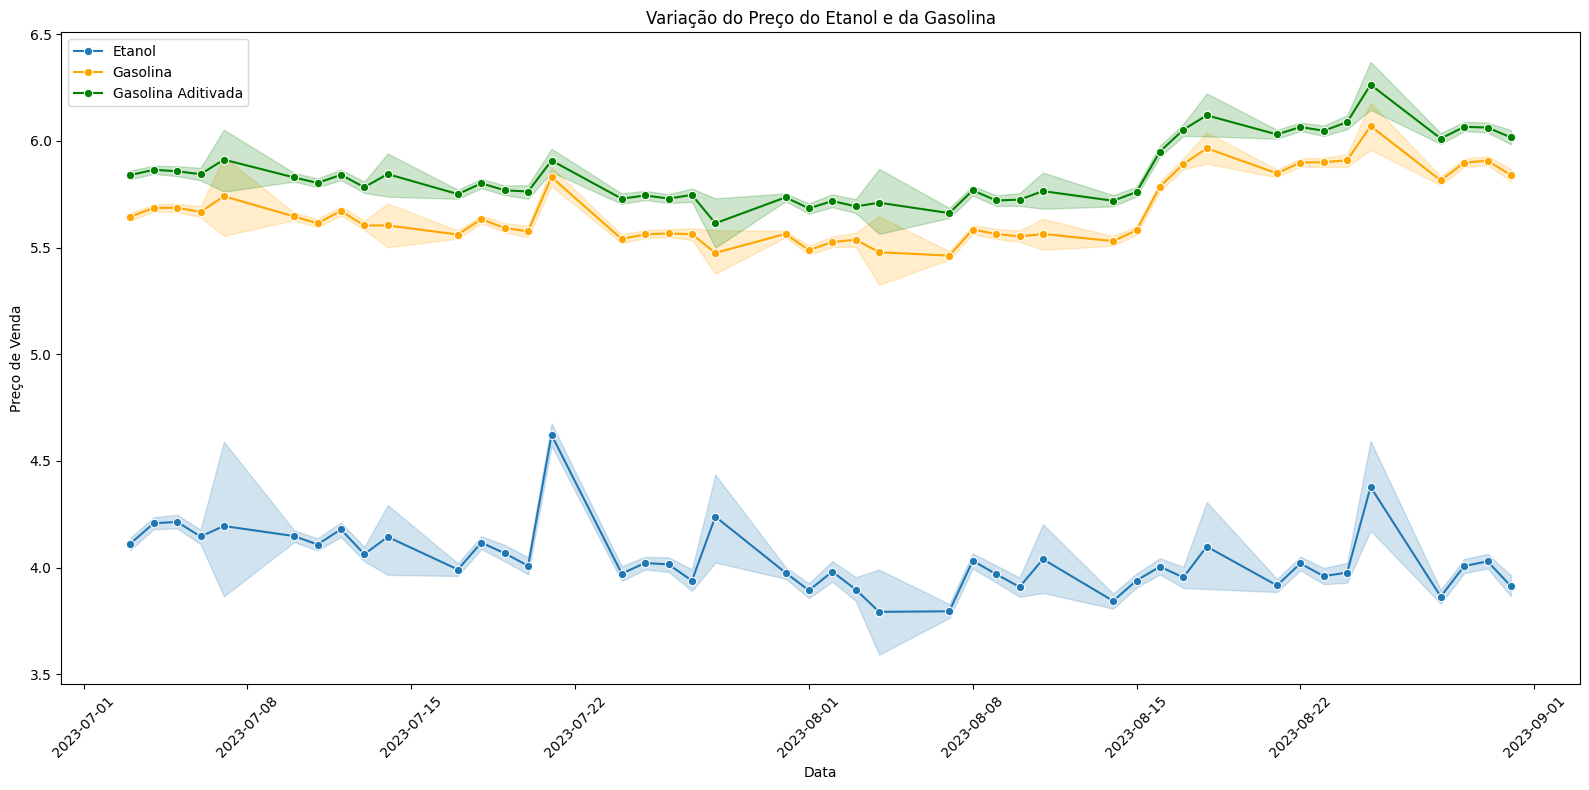

In [ ]:
# Usaremos nossas variáveis já criadas "gasolina", "etanol" e "gasolina_aditivada para plotar um gráfico do valores ao longo dos dois meses

plt.figure(figsize=(16,8))
sns.lineplot(data=etanol, x='Data da Coleta', y='Valor de Venda', marker='o', label='Etanol')
sns.lineplot(data=gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='orange', label='Gasolina')
sns.lineplot(data=gasolina_aditivada, x='Data da Coleta', y='Valor de Venda', marker='o', color='green', label='Gasolina Aditivada')
plt.xlabel('Data')
plt.ylabel('Preço de Venda')
plt.title('Variação do Preço do Etanol e da Gasolina')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Analisando o gráfico acima podemos perceber que:

- `Etanol` durante o mês 07, teve uma leve tendência de queda. Quando entrou o mês 08 tivemos uma queda brusca depois se manteve com alguns picos de queda e baixa grandes.
- `Gasolina` e `Gasolina Aditivada` se mantiveram muito próximos um do outro, com uma leve queda no mês 07 e uma alta quando entrou no mês 08.

###  <font color = red>**2. Qual o preço médio da gasolina e do etanol nesses dois meses?**

In [ ]:
# Preço medio da gasolina no mes de julho

gasolina_julho = gasolina[gasolina['Data da Coleta'].dt.month == 7]['Valor de Venda'].mean()

# Preço medio da gasolina no mes de agosto

gasolina_agosto = gasolina[gasolina['Data da Coleta'].dt.month == 8]['Valor de Venda'].mean()

# Preço medio do Etanol no mes de julho

etanol_julho = etanol[etanol['Data da Coleta'].dt.month == 7]['Valor de Venda'].mean()


# Preço medio do Etanol no mes de agosto

etanol_agosto = etanol[etanol['Data da Coleta'].dt.month == 8]['Valor de Venda'].mean()

# Preço medio da gasolina aditivada no mes de julho

gasolina_aditivada_julho = gasolina_aditivada[gasolina_aditivada['Data da Coleta'].dt.month == 7]['Valor de Venda'].mean()

# Preço medio da gasolina aditivada no mes de agosto

gasolina_aditivada_agosto = gasolina_aditivada[gasolina_aditivada['Data da Coleta'].dt.month == 8]['Valor de Venda'].mean()

In [ ]:
data = {
    'Combustível': ['Gasolina', 'Etanol', 'Gasolina Aditivada'],
    'julho': [gasolina_julho, etanol_julho, gasolina_aditivada_julho],
    'agosto': [gasolina_agosto, etanol_agosto, gasolina_aditivada_agosto]
}

df_precos_medios = pd.DataFrame(data)
df_precos_medios.round(2)

,Combustível,julho,agosto
0,Gasolina,5.61,5.71
1,Etanol,4.08,3.94
2,Gasolina Aditivada,5.79,5.89


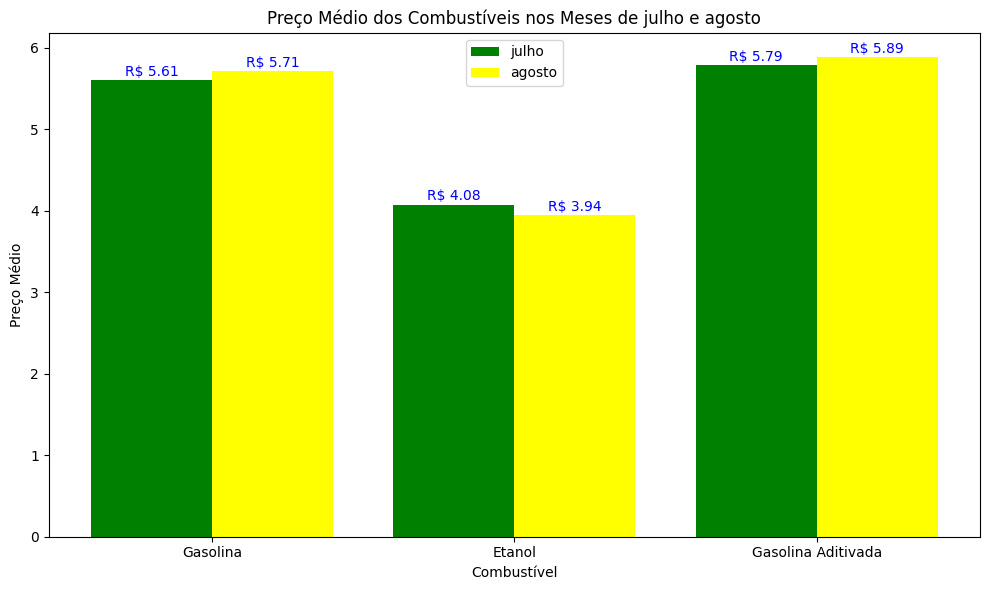

In [ ]:
# Dados
combustiveis = ['Gasolina', 'Etanol', 'Gasolina Aditivada']
precos_julho = [gasolina_julho, etanol_julho, gasolina_aditivada_julho]
precos_agosto = [gasolina_agosto, etanol_agosto, gasolina_aditivada_agosto]

# Configurar os valores das barras
bar_width = 0.4
r1 = range(len(combustiveis))
r2 = [x + bar_width for x in r1]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(r1, precos_julho, width=bar_width, label='julho', color='green')
plt.bar(r2, precos_agosto, width=bar_width, label='agosto', color='yellow')

# Adicionar rótulos e título
plt.xlabel('Combustível')
plt.ylabel('Preço Médio')
plt.title('Preço Médio dos Combustíveis nos Meses de julho e agosto')
plt.xticks([r + bar_width/2 for r in range(len(combustiveis))], combustiveis)
plt.legend()

# Adicionar valores acima das barras
for i, v in enumerate(precos_julho):
    plt.text(i, v + 0.05, f'R$ {v:.2f}', ha='center', color='blue')

for i, v in enumerate(precos_agosto):
    plt.text(i + bar_width, v + 0.05, f'R$ {v:.2f}', ha='center', color='blue')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Os preços médio dos combustíveis ficaram bem próximos durante esses dois meses. A **Gasolina Comum** e **Gasolina Aditivada** tiveram um aumento de R$ 0,10 centavos. No **Etanol** teve uma queda de R$ 0,14 Centavos uma queda razoável.

###  <font color = red>**3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?**

### - Vamos levar em consideração os 2 meses que estamos analisando

In [ ]:
# Calcular os preços médios por estado para gasolina, etanol e gasolina aditivada
gasolina_estados = gasolina.groupby('Estado - Sigla')['Valor de Venda'].mean()
etanol_estados = etanol.groupby('Estado - Sigla')['Valor de Venda'].mean()
gasolina_aditivada_estados = gasolina_aditivada.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Criar um DataFrame com os preços médios por estado
df_precos_medios = pd.DataFrame({
    'Gasolina': gasolina_estados,
    'Etanol': etanol_estados,
    'Aditivada': gasolina_aditivada_estados
})

# Ordenar o DataFrame em ordem decrescente com base nos preços médios de gasolina
df_precos_medios = df_precos_medios.sort_values(by='Gasolina', ascending=False)

# Selecionar os 5 primeiros estados
top5_estados = df_precos_medios
# Imprimir o DataFrame com os preços médios dos 5 estados mais caros
top5_estados.head().round(2)


,Gasolina,Etanol,Aditivada
Estado - Sigla,,,
AC,6.62,4.84,6.56
AM,6.52,4.66,6.46
RO,6.20,5.08,6.28
CE,6.04,4.79,6.16
BA,6.02,4.55,6.11


<Figure size 1500x1400 with 0 Axes>

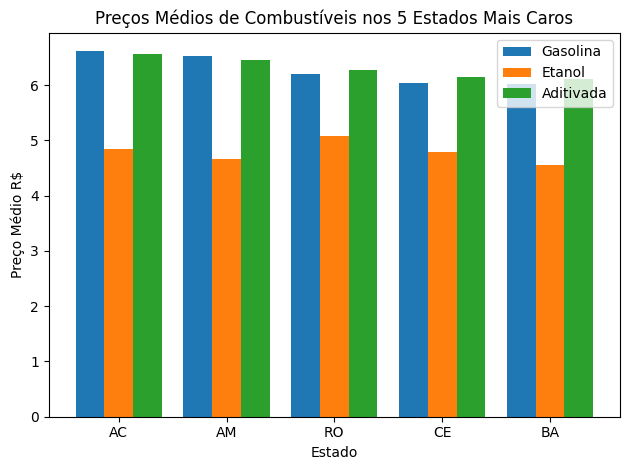

In [ ]:
top5_estados_preco_medio_alto = df_precos_medios.head(5)

# Plotar o gráfico de barras
plt.figure(figsize=(15, 14))
top5_estados_preco_medio_alto.plot(kind='bar', width=0.8)
plt.title('Preços Médios de Combustíveis nos 5 Estados Mais Caros')
plt.xlabel('Estado')
plt.ylabel('Preço Médio R$')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()

# Exibir o gráfico
plt.show()

###O nosso ranking de estados com preços médios mais caros do Brasil são:

1. **Acre**
2. **Amazonas**
3. **Rondonia**
4. **Ceará**
5. **Bahia**

###São 4 estados da região norte do país que contém os preços mais caros de combustíveis, isso deve-se a dificuldade de acesso e a grande distância que se tem dos centros de distribuições.

###  <font color = red>**4. Qual o preço médio da gasolina e do etanol por estado?**

In [ ]:
# Configuração para mostrar todas as colunas do dataframe abaixo
pd.set_option('display.max_columns', None)

df_precos_medios.round(2).T

Estado - Sigla,AC,AM,RO,CE,BA,TO,SE,RN,RR,PA,ES,AL,SC,PE,RS,PR,MA,MS,PB,PI,RJ,GO,MT,DF,MG,SP,AP
Gasolina,6.62,6.52,6.20,6.04,6.02,6.02,5.97,5.96,5.95,5.88,5.81,5.81,5.80,5.71,5.70,5.68,5.65,5.64,5.63,5.62,5.61,5.59,5.59,5.57,5.48,5.46,5.40
Etanol,4.84,4.66,5.08,4.79,4.55,4.62,4.67,4.87,5.09,4.85,4.41,4.64,4.59,4.48,4.82,3.98,4.67,3.83,4.35,4.41,4.27,3.68,3.42,3.78,3.72,3.54,5.36
Aditivada,6.56,6.46,6.28,6.16,6.11,6.13,6.06,6.02,6.04,6.12,5.94,5.92,5.92,5.86,5.87,5.85,5.78,5.82,5.80,5.84,5.77,5.73,5.72,5.67,5.67,5.71,5.66


In [ ]:
# Restaurar as configurações padrão de visualização do pandas
pd.reset_option('display.max_columns')

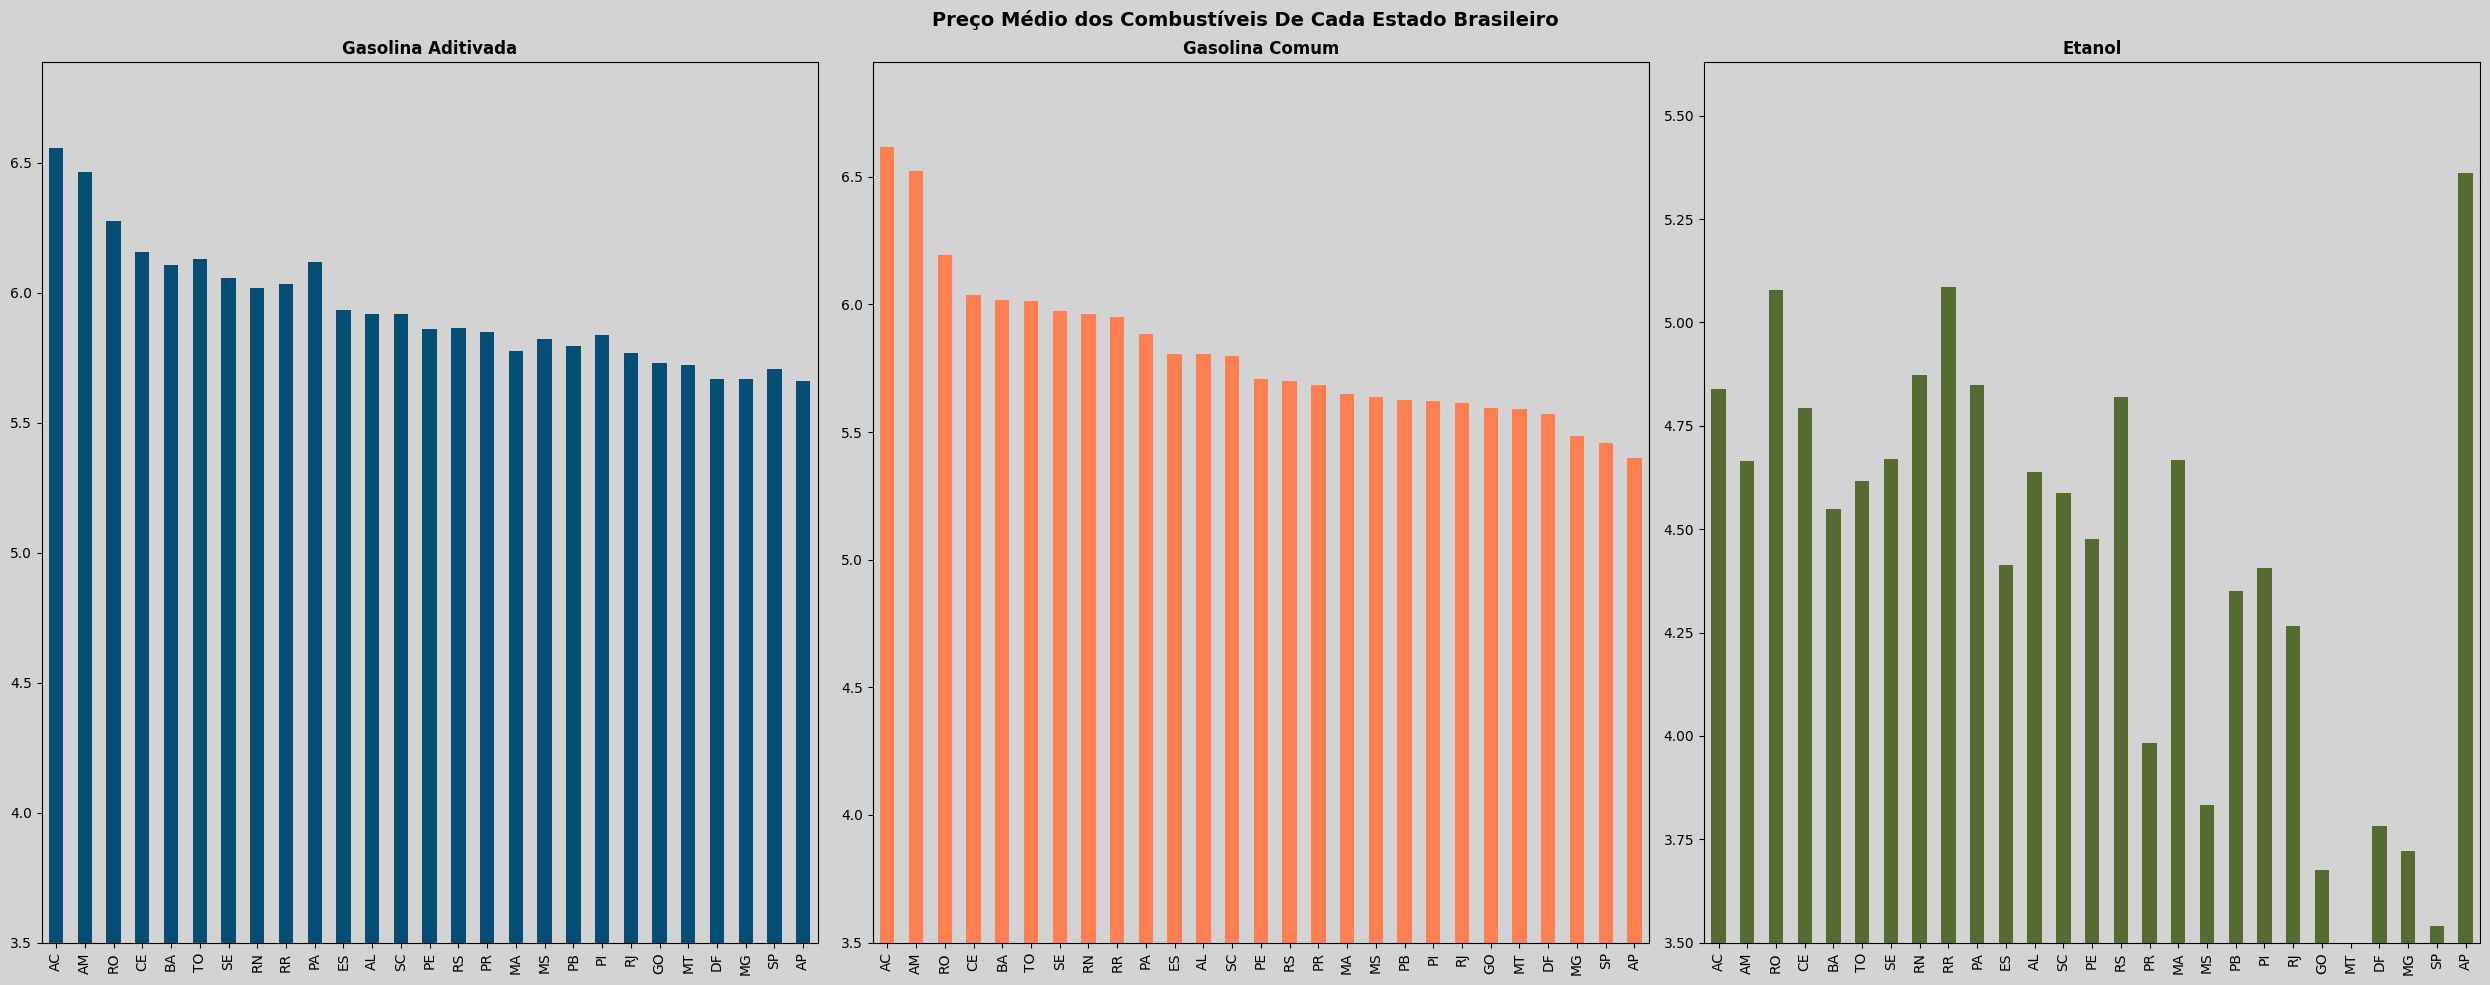

In [ ]:
# Gasolina Aditivada
figura = plt.figure(figsize=(25, 15), facecolor='lightgray')
figura.suptitle('Preço Médio dos Combustíveis De Cada Estado Brasileiro', fontsize=14, fontweight='bold')

figura.add_subplot(131, facecolor='lightgray')
df_precos_medios['Aditivada'].plot(kind='bar', figsize=(25, 10), ylim=3.5, color='#054F77')
plt.title('Gasolina Aditivada', fontsize=12, fontweight='bold')
plt.xlabel(None)

# Gasolina Comum
figura.add_subplot(132, facecolor='lightgray')
df_precos_medios['Gasolina'].plot(kind='bar', figsize=(25, 10), ylim=3.5, color='#FF7F50')
plt.title('Gasolina Comum', fontsize=12, fontweight='bold')
plt.xlabel(None)

# Etanol
figura.add_subplot(133, facecolor='lightgray')
df_precos_medios['Etanol'].plot(kind='bar', figsize=(25, 10), ylim=3.5, color='#556B2F')
plt.title('Etanol', fontsize=12, fontweight='bold')
plt.xlabel(None)

plt.tight_layout()

### Como podemos observar no DataFrame e visualmente no gráfico acima, temos a média de preços dos combustíveis de todos os estados brasileiros. Por diversos fatores um estado pode ter o combustível mais caro que outro, seja pela cobrança de impostos que é diferente de um estado para outro ou pela dificuldade de transporte para estados mais distantes do litoral, uma solução seria resolver o problema de infraestrutura para que o combustível possa chegar a um preço competitivo nesses locais, em especial na região Norte do país. Podemos obter as seguintes conclusões analisando o gráfico acima.

- Os estados da região **Norte** tem a média de preço mais cara do País.
- Os estados mais próximos a costa tendem a ter o preço médio menor em comparação ao restante do país, pois é onde a produção e importação dos combustíveis acontece.
- O estado do **Amapá** possui a menor média de preço da Gasolina do país, mas por outro lado, possui o etanol mais caro.
- A média de preço mais alta da Gasolina e Gasolina Aditivada é do estado do **Amazonas**.
- O estado do **Mato Grosso** tem a média de preço do Etanol mais barata do Brasil. Apesar de ser o 3° maior produtor do biocombustível no Brasil.



###  <font color = red>**5. Qual o município que possui o menor preço para a gasolina e para o etanol?**

In [ ]:
# Juntar os DataFrames de gasolina, etanol e gasolina aditivada
df_combustiveis = pd.concat([gasolina, etanol, gasolina_aditivada], ignore_index=True)

# Calcular os menores preços por município para cada tipo de combustível
menores_precos = df_combustiveis.groupby(['Municipio', 'Estado - Sigla', 'Produto'])['Valor de Venda'].min()

# Resetar o índice para tornar os grupos em colunas
df_menores_precos = menores_precos.reset_index()

# Encontrar o município com o menor preço para cada tipo de combustível
menor_preco_gasolina = df_menores_precos[df_menores_precos['Produto'] == 'GASOLINA'].groupby('Produto').apply(lambda x: x.nsmallest(1, 'Valor de Venda'))
menor_preco_etanol = df_menores_precos[df_menores_precos['Produto'] == 'ETANOL'].groupby('Produto').apply(lambda x: x.nsmallest(1, 'Valor de Venda'))
menor_preco_aditivada = df_menores_precos[df_menores_precos['Produto'] == 'GASOLINA ADITIVADA'].groupby('Produto').apply(lambda x: x.nsmallest(1, 'Valor de Venda'))

# Concatenar os resultados dos menores preços para cada tipo de combustível
df_menores_preco_por_combustivel = pd.concat([menor_preco_gasolina, menor_preco_etanol, menor_preco_aditivada])
df_menores_preco_por_combustivel.reset_index(drop=True, inplace=True)
# Imprimir o DataFrame com os municípios com os menores preços para cada tipo de combustível
df_menores_preco_por_combustivel

,Municipio,Estado - Sigla,Produto,Valor de Venda
0,SOROCABA,SP,GASOLINA,4.49
1,SANTA BARBARA D'OESTE,SP,ETANOL,2.75
2,DIADEMA,SP,GASOLINA ADITIVADA,4.69


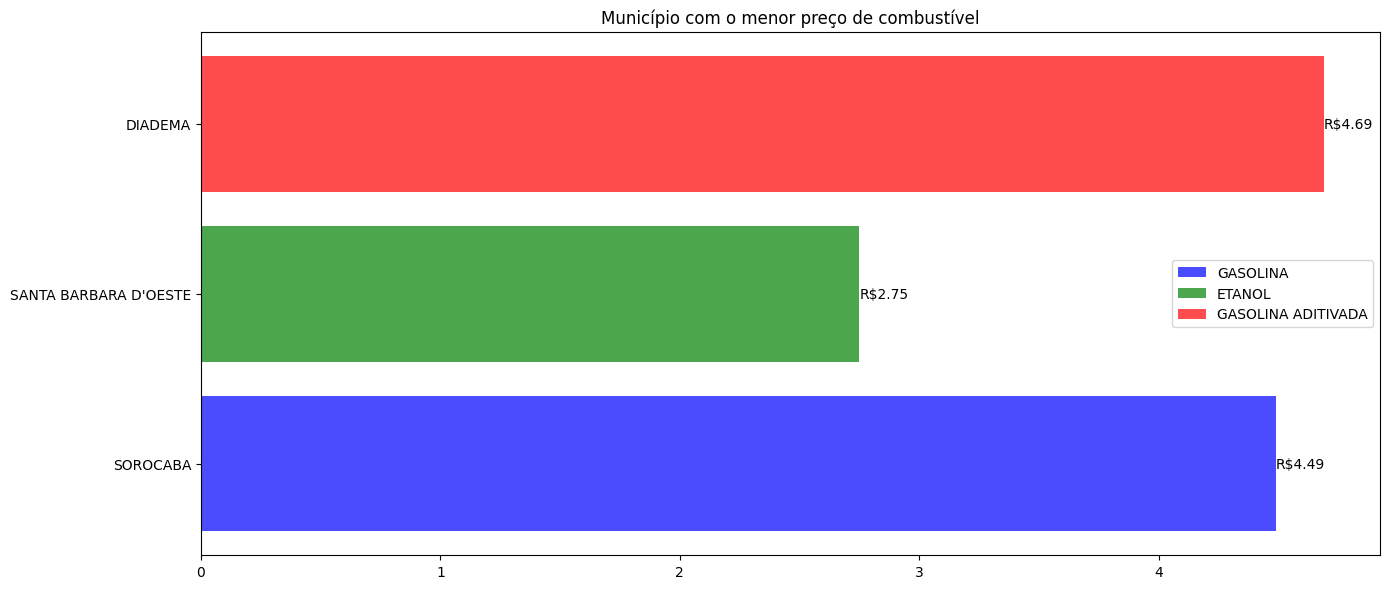

In [ ]:
# Dados de exemplo
estado_sigla_menores_preco = df_menores_preco_por_combustivel['Estado - Sigla']
municipios_menores_preco = df_menores_preco_por_combustivel['Municipio']
produtos = df_menores_preco_por_combustivel['Produto']
valores = df_menores_preco_por_combustivel['Valor de Venda']
cores = ['blue', 'green', 'red']  # Lista de cores para as barras

plt.figure(figsize=(14, 6))

# Iterar sobre os dados e plotar as barras com cores e rótulos
for i, (produto, valor, cor) in enumerate(zip(produtos, valores, cores)):
    plt.barh(produto, valor, color=cor, alpha=0.7, label=produto)
    plt.text(valor, i, f'R${valor:.2f}', ha='left', va='center')  # Adicionar valor extato ao lado da barra

plt.title('Município com o menor preço de combustível')
plt.legend()  # Adiciona a legenda com base nos rótulos fornecidos no loop

plt.yticks(range(len(municipios_menores_preco)), municipios_menores_preco)

plt.tight_layout()
plt.show()

### Ao observar nosso DataFrame e o gráfico acima, podemos conhecer quais são os municípios onde cada tipo de combustível é o mais barato do país. O interessante de se notar é que todos são municípios do estado de São Paulo. Podemos concluir que os municípios com o menor preço de combustíveis são:

- `Diadema (SP)` com a gasolina aditivada mais barata do Brasil.
- ` SANTA BARBARA D'OESTE	(SP)` com o etanol mais barato do Brasil.
- `Sorocaba (SP)` com a Gasolina mais barata do Brasil.

Alguns pontos prováveis de se explicar o porque de apenas terem municípios do estado de São Paulo nessa análise são:

- O sudeste é a segunda região em que a média é a mais baixa de cobrança de ICMS.
- São Paulo é o maior produtor de Cana-de-açúcar do Brasil com 54,1% da quantidade produzida na safra 2020/21.
- São Paulo é onde se concentra o maior número de refinarias no Brasil, aproximadamente 38% da capacidade de refino nacional.


###  <font color = red>**6. Qual o município que possui o maior preço para a gasolina e para o etanol?**

In [ ]:
# Encontrar o município com o maior preço para a gasolina e para o etanol
maior_preco_gasolina = df_menores_precos[df_menores_precos['Produto'] == 'GASOLINA'].groupby('Produto').apply(lambda x: x.nlargest(1, 'Valor de Venda'))
maior_preco_etanol = df_menores_precos[df_menores_precos['Produto'] == 'ETANOL'].groupby('Produto').apply(lambda x: x.nlargest(1, 'Valor de Venda'))
maior_preco_aditivada = df_menores_precos[df_menores_precos['Produto'] == 'GASOLINA ADITIVADA'].groupby('Produto').apply(lambda x: x.nlargest(1, 'Valor de Venda'))
# Concatenar os resultados dos maiores preços para cada tipo de combustível
df_maiores_preco_por_combustivel = pd.concat([maior_preco_gasolina, maior_preco_etanol,maior_preco_aditivada ])
df_maiores_preco_por_combustivel.reset_index(drop=True, inplace=True)

# Imprimir o DataFrame com os municípios com os maiores preços para a gasolina e o etanol
df_maiores_preco_por_combustivel


,Municipio,Estado - Sigla,Produto,Valor de Venda
0,TEFE,AM,GASOLINA,7.20
1,CRUZEIRO DO SUL,AC,ETANOL,5.49
2,TEFE,AM,GASOLINA ADITIVADA,7.29


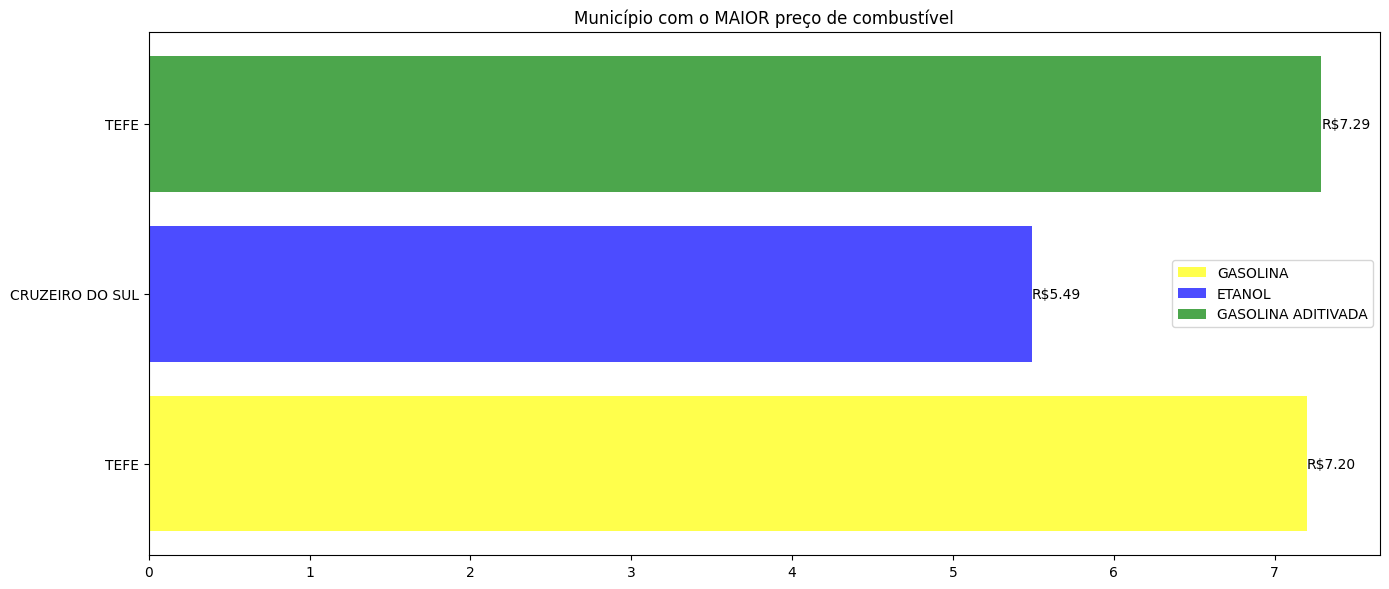

In [ ]:
estado_sigla_maiores_preco = df_maiores_preco_por_combustivel['Estado - Sigla']
municipios_maiores_preco = df_maiores_preco_por_combustivel['Municipio']
produtos = df_maiores_preco_por_combustivel['Produto']
valores = df_maiores_preco_por_combustivel['Valor de Venda']
cores = ['yellow', 'blue', 'green']  # Lista de cores para as barras

plt.figure(figsize=(14, 6))

# Iterar sobre os dados e plotar as barras com cores e rótulos
for i, (produto, valor, cor) in enumerate(zip(produtos, valores, cores)):
    plt.barh(produto, valor, color=cor, alpha=0.7, label=produto)
    plt.text(valor, i, f'R${valor:.2f}', ha='left', va='center')  # Adicionar valor extato ao lado da barra

plt.title('Município com o MAIOR preço de combustível')
plt.legend()  # Adiciona a legenda com base nos rótulos fornecidos no loop

plt.yticks(range(len(municipios_maiores_preco)), municipios_maiores_preco)

plt.tight_layout()
plt.show()

Com o DataFrame e o gráfico acima, agora temos os municípios com o maior preço de combustível do Brasil. Como ja mencionado em analises anteriores os estados do norte do país são os que estão sempre acima da média dos valores de combustíveis em relação aos outros estados brasileiros. Podemos então concluir com esta análise que:

- `Tefe` do estado do Amazonas é o município com a Gasolina Aditivada mais cara do Brasil.
- `Cruzeiro do Sul` do estado do Acre, é o município com o Etanol mais caro do país.
- `Tefe` novamente também do estado do Amazonas, é o município com a Gasolina mais cara do Brasil.

Ambas os municípios citados são distantes dos centros de distribuição de combustíveis, dificultando o transporte para esses locais.


###  <font color = red>**7. Qual a região que possui o maior valor médio da gasolina?**

In [ ]:
# Calcular os valores médios por região para a gasolina aditivada
media_gasolina_aditivada_por_regiao = df_combustiveis[df_combustiveis['Produto'] == 'GASOLINA ADITIVADA'].groupby('Regiao - Sigla')['Valor de Venda'].mean()

# Encontrar as 5 regiões com os maiores valores médios da gasolina aditivada
top5_regioes_gasolina_aditivada = media_gasolina_aditivada_por_regiao.nlargest(5)

# Criar um DataFrame com as 5 regiões e seus valores médios de gasolina aditivada
df_top5_regioes_gasolina_aditivada = pd.DataFrame({
    'Regiao': top5_regioes_gasolina_aditivada.index,
    'Valor Médio Gasolina Aditivada': top5_regioes_gasolina_aditivada.round(2)
})

# Calcular os valores médios por região para a gasolina
media_gasolina_por_regiao = df_combustiveis[df_combustiveis['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')['Valor de Venda'].mean()

# Encontrar as 5 regiões com os maiores valores médios da gasolina
top5_regioes_gasolina = media_gasolina_por_regiao.nlargest(5)

# Criar um DataFrame com as 5 regiões e seus valores médios de gasolina
df_top5_regioes_gasolina = pd.DataFrame({
    'Regiao': top5_regioes_gasolina.index,
    'Valor Médio Gasolina': top5_regioes_gasolina.round(2)
})

# Combinar os DataFrames das duas gasolinas
df_top5_regioes = pd.merge(df_top5_regioes_gasolina, df_top5_regioes_gasolina_aditivada, on='Regiao', how='outer')

# Imprimir o DataFrame
df_top5_regioes

,Regiao,Valor Médio Gasolina,Valor Médio Gasolina Aditivada
0,N,6.08,6.22
1,NE,5.86,5.99
2,S,5.72,5.87
3,CO,5.60,5.73
4,SE,5.50,5.72


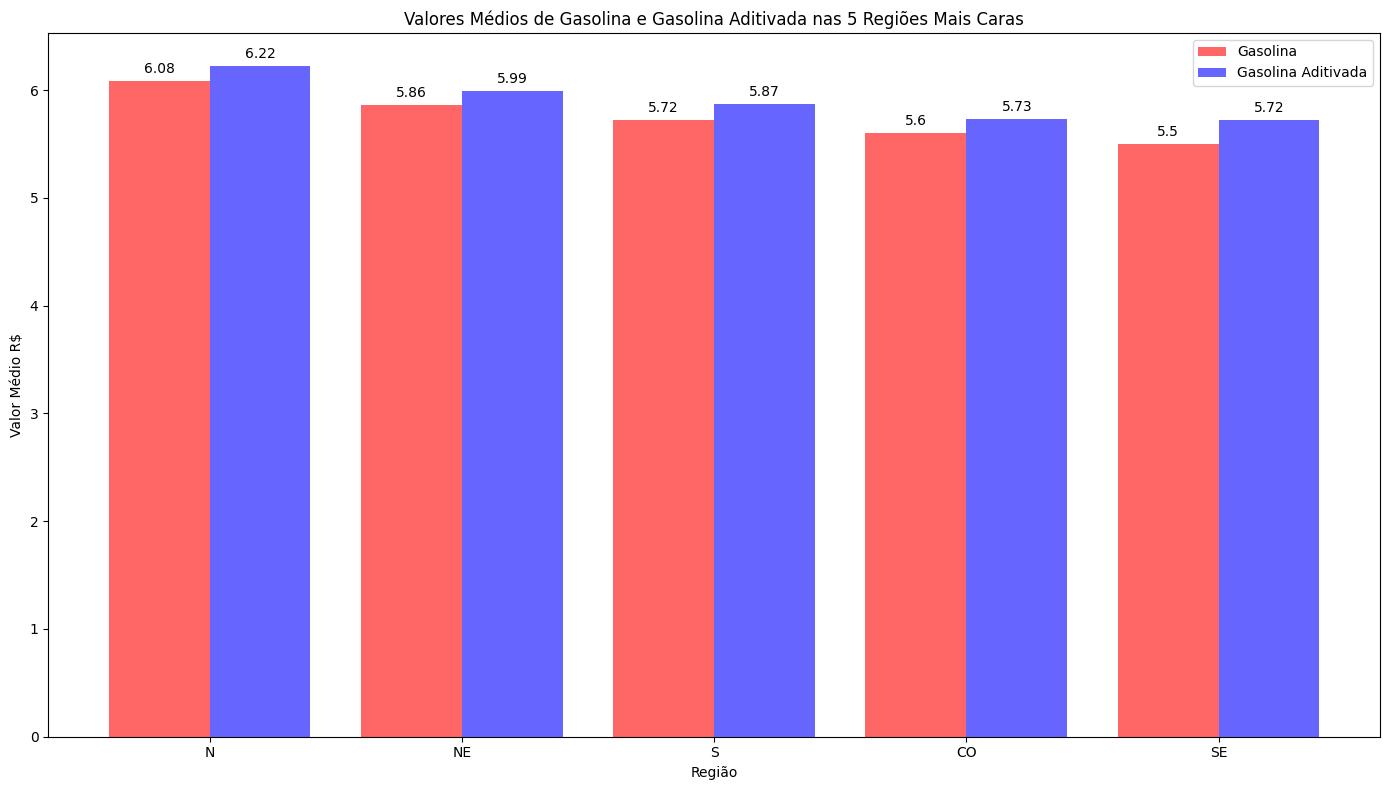

In [ ]:
# Definir a largura das barras
bar_width = 0.4

# Criar um array de índices para as regiões
indices = np.arange(len(df_top5_regioes))

# Plotar o gráfico de barras lado a lado
plt.figure(figsize=(14, 8))

plt.bar(indices, df_top5_regioes['Valor Médio Gasolina'], bar_width, label='Gasolina', color='red', alpha=0.6)
plt.bar(indices + bar_width, df_top5_regioes['Valor Médio Gasolina Aditivada'], bar_width, label='Gasolina Aditivada', color='blue', alpha=0.6)

# Adicionar os valores nas barras
for i, v in enumerate(df_top5_regioes['Valor Médio Gasolina']):
    plt.text(i, v + 0.05, str(v), ha='center', va='bottom', color='black')

for i, v in enumerate(df_top5_regioes['Valor Médio Gasolina Aditivada']):
    plt.text(i + bar_width, v + 0.05, str(v), ha='center', va='bottom', color='black')

plt.title('Valores Médios de Gasolina e Gasolina Aditivada nas 5 Regiões Mais Caras')
plt.xlabel('Região')
plt.ylabel('Valor Médio R$')
plt.xticks(indices + bar_width / 2, df_top5_regioes['Regiao'])
plt.legend()
plt.tight_layout()

# Exibir o gráfico
plt.show()

###Análisando o gráfico podemos perceber que a região norte tem a **Gasolina mais cara do país**, enquanto que a região sudeste tem a média mais barata do Brasil. Mas em todas as regiões os preços médios se mantém acima de R$ 5,50.

### <font color = red>**8. Qual a região que possui o menor valor médio do etanol?**

In [ ]:
# Calcular os valores médios por região para o etanol
media_etanol_por_regiao = df_combustiveis[df_combustiveis['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')['Valor de Venda'].mean()

# Encontrar as 5 regiões com os menores valores médios do etanol
top5_regioes_etanol = media_etanol_por_regiao.nsmallest(5)

# Criar um DataFrame com as 5 regiões e seus valores médios de etanol
df_top5_regioes_etanol = pd.DataFrame({

    'Valor Médio Etanol': top5_regioes_etanol.round(2)
})

# Imprimir o DataFrame
df_top5_regioes_etanol

,Valor Médio Etanol
Regiao - Sigla,
CO,3.67
SE,3.72
S,4.31
NE,4.59
N,4.79


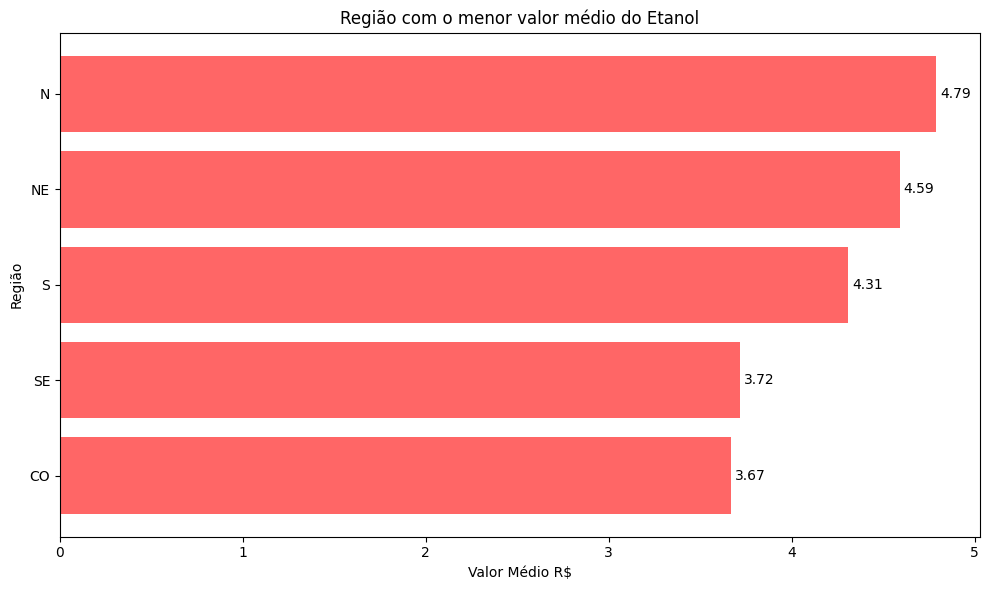

In [ ]:
# Criar um array de índices para as regiões
indices = np.arange(len(df_top5_regioes_etanol))

# Plotar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))

plt.barh(indices, df_top5_regioes_etanol['Valor Médio Etanol'], color='red', alpha=0.6)

# Adicionar os valores nas barras
for i, v in enumerate(df_top5_regioes_etanol['Valor Médio Etanol']):
    plt.text(v + 0.02, i, str(v), ha='left', va='center', color='black')

plt.title('Região com o menor valor médio do Etanol')
plt.xlabel('Valor Médio R$')
plt.ylabel('Região')
plt.yticks(indices, df_top5_regioes_etanol.index)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Observando o DataFrame e o gráfico acima, podemos perceber que a região Centro-Oeste tem o menor valor médio do Etanol em todo o Brasil. Seguido da região Sudeste, essas duas regiões são os maiores cultivadores e produtores de cana-de-açucar.

###  <font color = red>**9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?**

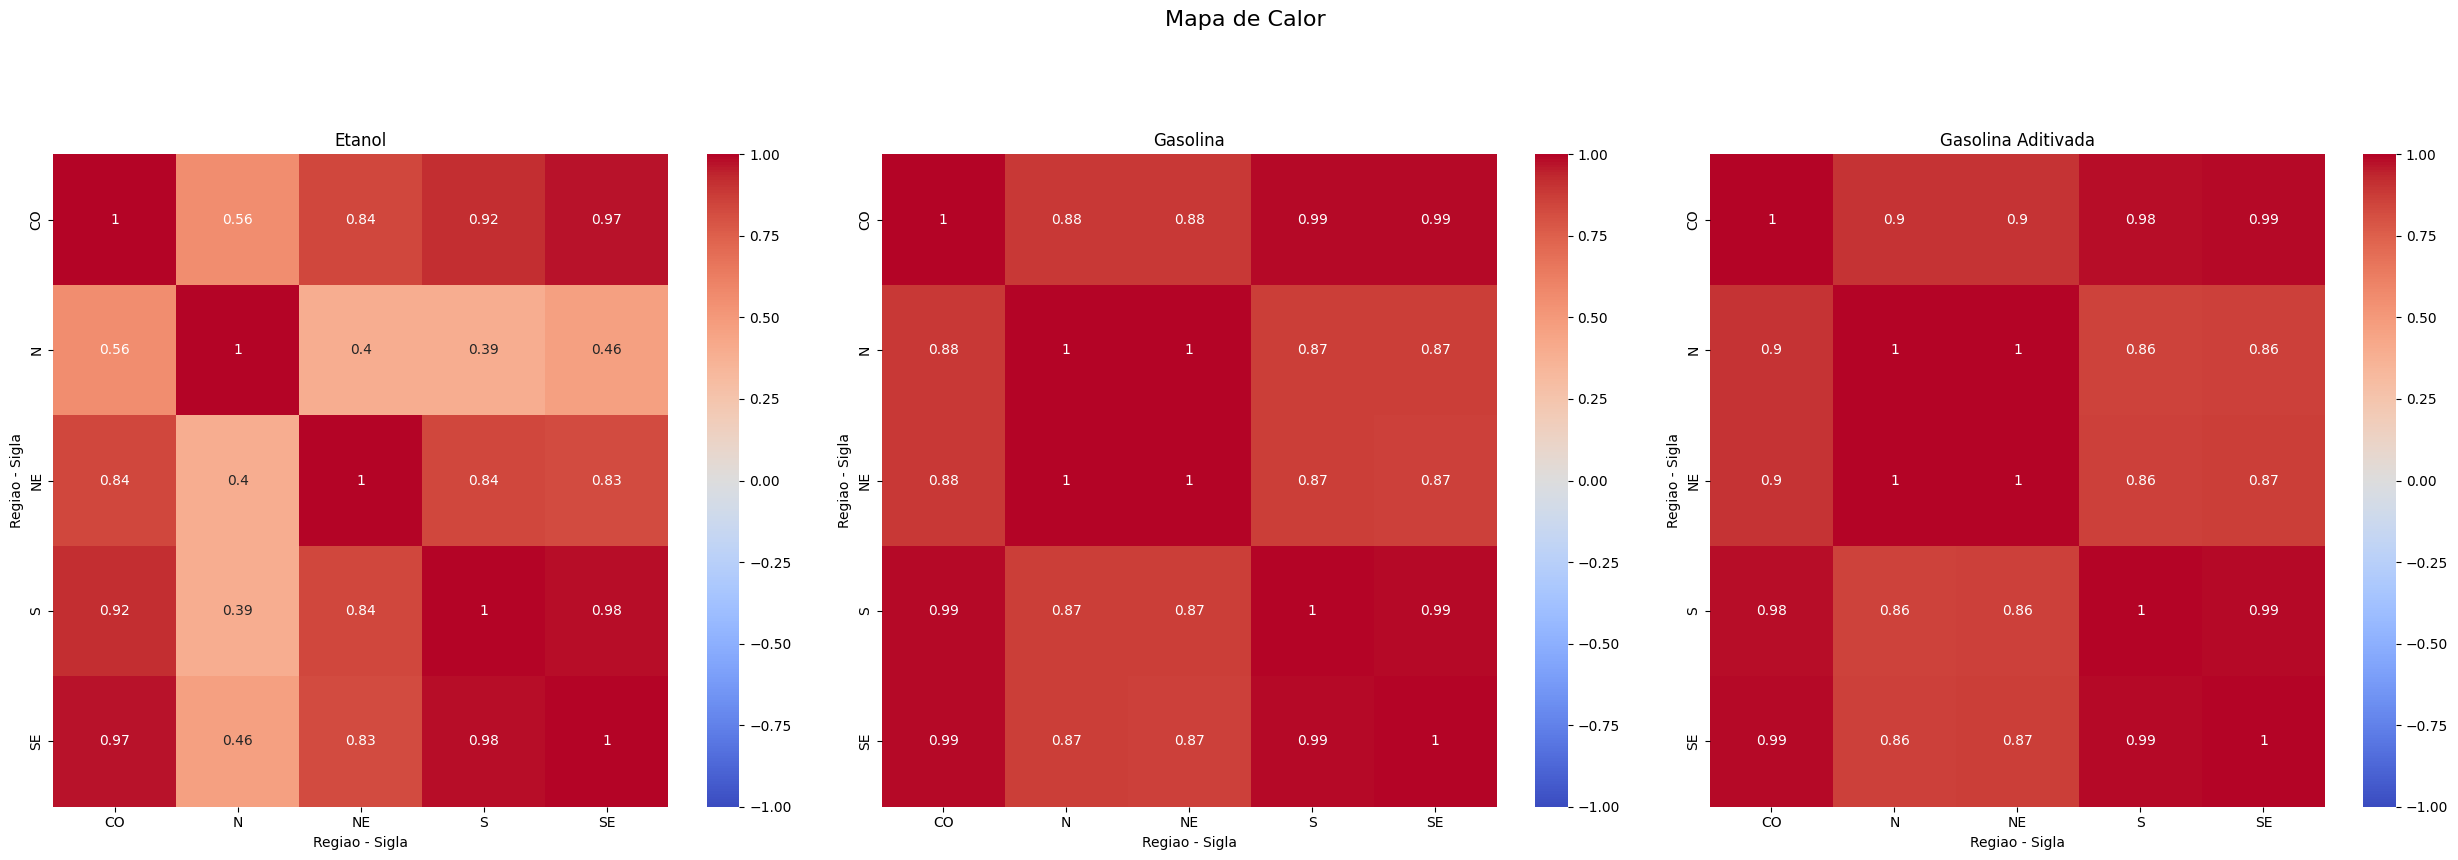

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenando os DataFrames de maio e junho
data = pd.concat([combustiveis_maio, combustiveis_junho], ignore_index=True)

# Convertendo a coluna "Valor de Venda" para formato numérico
data['Valor de Venda'] = data['Valor de Venda'].str.replace(',', '.').str.extract('(\d+\.\d+)').astype(float)

# Convertendo a coluna "Data da Coleta" para formato de data
data['Data da Coleta'] = pd.to_datetime(data['Data da Coleta'], dayfirst=True)

# Calculando a média semanal dos valores de venda
data['Semana'] = data['Data da Coleta'].dt.strftime('%U')

# Calculando a correlação para ETANOL
data_etanol = data[data['Produto'] == 'ETANOL']
weekly_avg_etanol = data_etanol.groupby(['Regiao - Sigla', 'Semana'])['Valor de Venda'].mean().reset_index()
pivot_table_etanol = weekly_avg_etanol.pivot(index='Semana', columns='Regiao - Sigla', values='Valor de Venda')
correlation_matrix_etanol = pivot_table_etanol.corr()

# Calculando a correlação para GASOLINA
data_gasolina = data[data['Produto'] == 'GASOLINA']
weekly_avg_gasolina = data_gasolina.groupby(['Regiao - Sigla', 'Semana'])['Valor de Venda'].mean().reset_index()
pivot_table_gasolina = weekly_avg_gasolina.pivot(index='Semana', columns='Regiao - Sigla', values='Valor de Venda')
correlation_matrix_gasolina = pivot_table_gasolina.corr()

# Calculando a correlação para GASOLINA ADITIVADA
data_aditivada = data[data['Produto'] == 'GASOLINA ADITIVADA']
weekly_avg_aditivada = data_aditivada.groupby(['Regiao - Sigla', 'Semana'])['Valor de Venda'].mean().reset_index()
pivot_table_aditivada = weekly_avg_aditivada.pivot(index='Semana', columns='Regiao - Sigla', values='Valor de Venda')
correlation_matrix_aditivada = pivot_table_aditivada.corr()

# Criando mapas de calor (heatmaps) para cada combustível
plt.figure(figsize=(25, 9))

plt.suptitle("Mapa de Calor", fontsize=16)

plt.subplot(1, 3, 1)
sns.heatmap(correlation_matrix_etanol, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Etanol')

plt.subplot(1, 3, 2)
sns.heatmap(correlation_matrix_gasolina, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Gasolina')

plt.subplot(1, 3, 3)
sns.heatmap(correlation_matrix_aditivada, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Gasolina Aditivada')

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()


### Certamente. Através da análise do mapa de calor, podemos avaliar a correlação entre o valor do combustível (gasolina e etanol) e as diferentes regiões onde são vendidos. Observando as médias dos valores de venda ao longo dos meses, é possível notar que as variações nos preços entre as regiões não apresentam uma diferença significativa. Especificamente para a gasolina e a gasolina aditivada, as médias são praticamente alinhadas entre os meses, sugerindo uma relação consistente e pouco variável.

#### No entanto, ao analisar o comportamento do etanol, observamos uma variação distinta. A correlação de 0.22 entre as regiões norte e nordeste indica uma relação fraca ou até mesmo inexistente entre os preços do etanol nessas duas regiões. Isso nos sugere que fatores distintos podem estar influenciando os preços do etanol em cada uma dessas regiões, resultando em uma correlação menos pronunciada.

#### Portanto, enquanto os preços da gasolina e da gasolina aditivada mantêm uma estabilidade nas médias entre as regiões, o etanol demonstra um padrão diferente, sugerindo uma possível falta de correlação nos preços entre as regiões norte e nordeste. Essa análise nos ajuda a compreender melhor as dinâmicas dos preços dos combustíveis em relação às diferentes regiões do país.

###  <font color = red>**10. Qual a proporção de postos de bandeira branca, grandes marcas e pequenas marcas em cada região? Isso pode influenciar nos preços?**

In [ ]:

# Filtrando as colunas relevantes
filtered_data = data[['Regiao - Sigla', 'Bandeira']]

# Calculando o número total de postos em cada região
total_por_regiao = filtered_data['Regiao - Sigla'].value_counts()

# Calculando o número de postos de cada tipo em cada região
postos_bandeira_branca = filtered_data[filtered_data['Bandeira'] == 'BRANCA']['Regiao - Sigla'].value_counts()
postos_grandes_marcas = filtered_data[filtered_data['Bandeira'].isin(['BR', 'IPIRANGA', 'Raízen', 'ALE'])]['Regiao - Sigla'].value_counts()
postos_pequenas_marcas = total_por_regiao - postos_bandeira_branca - postos_grandes_marcas

# Calculando a proporção de cada tipo de posto em relação ao número total de postos em cada região
proporcao_bandeira_branca = (postos_bandeira_branca / total_por_regiao) * 100
proporcao_grandes_marcas = (postos_grandes_marcas / total_por_regiao) * 100
proporcao_pequenas_marcas = (postos_pequenas_marcas / total_por_regiao) * 100

# Criando um DataFrame para armazenar as proporções
proporcoes_por_regiao = pd.DataFrame({
    'Proporção Bandeira Branca (%)': proporcao_bandeira_branca,
    'Proporção Grandes Marcas (%)': proporcao_grandes_marcas,
    'Proporção Pequenas Marcas (%)': proporcao_pequenas_marcas
})

# Exibindo o DataFrame resultante
proporcoes_por_regiao.round(2)

,Proporção Bandeira Branca (%),Proporção Grandes Marcas (%),Proporção Pequenas Marcas (%)
CO,37.53,22.46,40.01
N,24.76,23.40,51.84
NE,38.85,12.08,49.08
S,27.60,31.50,40.90
SE,34.10,22.37,43.53


### Sim, a proporção de postos de bandeira branca, grandes marcas e pequenas marcas em uma região pode influenciar nos preços dos combustíveis. Postos de bandeira branca tendem a ter mais flexibilidade para ajustar preços de acordo com a concorrência local, podendo levar a preços mais baixos devido à competição. Grandes marcas, por outro lado, podem oferecer vantagens e programas de fidelidade, mas também podem ter custos mais altos. A presença de diferentes tipos de postos cria um cenário competitivo que pode impactar a formação de preços na região.

###  <font color = red>**11. Estados com maior aumento percentual no valor de venda do etanol nos dois meses**

In [ ]:
import pandas as pd

# E que os dados estejam no formato correto (exemplo abaixo)
data = pd.concat([combustiveis_maio, combustiveis_junho], ignore_index=True)

# Convertendo a coluna "Valor de Venda" para formato numérico
data['Valor de Venda'] = data['Valor de Venda'].str.replace(',', '.').str.extract('(\d+\.\d+)').astype(float)

etanol_data = data[data['Produto'] == 'ETANOL']

# Calcular a média de preço de etanol para maio e junho por estado
etanol_data_maio = etanol_data[etanol_data['Data da Coleta'].str.contains('05/2023')]
etanol_data_junho = etanol_data[etanol_data['Data da Coleta'].str.contains('06/2023')]
media_preco_etanol_maio = etanol_data_maio.groupby('Estado - Sigla')['Valor de Venda'].mean()
media_preco_etanol_junho = etanol_data_junho.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Calcular a variação percentual do preço do etanol entre maio e junho para cada estado
variacoes_percentuais = ((media_preco_etanol_junho - media_preco_etanol_maio) / media_preco_etanol_maio) * 100

# Ordenar os estados em ordem decrescente de variação percentual
estados_maior_aumento = variacoes_percentuais.sort_values(ascending=False)

# Criar um dicionário para mapear as siglas dos estados às regiões
estados_regioes = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AP': 'Norte',
    'AM': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro-Oeste',
    'MA': 'Nordeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'MG': 'Sudeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PR': 'Sul',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RS': 'Sul',
    'RO': 'Norte',
    'RR': 'Norte',
    'SC': 'Sul',
    'SP': 'Sudeste',
    'SE': 'Nordeste',
    'TO': 'Norte'
}

# Criar um DataFrame com os estados que mais aumentaram o preço do etanol
df_estados_aumento = pd.DataFrame({
    'Estado': estados_maior_aumento.index,
    'Variação Percentual': estados_maior_aumento.values
})

# Mapear as siglas dos estados para as regiões
df_estados_aumento['Região'] = df_estados_aumento['Estado'].map(estados_regioes)

# Adicionar o símbolo de porcentagem (%) à coluna de variação percentual
df_estados_aumento['Variação Percentual'] = df_estados_aumento['Variação Percentual'].apply(lambda x: f'{x:.2f}%')

# Exibir o DataFrame com os estados que mais aumentaram o preço do etanol
df_estados_aumento.head()

,Estado,Variação Percentual,Região


###  <font color = red>**12.Qual bandeira tem mais postos de combustível?**

In [ ]:
# Criando dataframe com as bandeiras mais frequentes
combustiveis = pd.concat([combustiveis_maio, combustiveis_junho,], ignore_index=True)
bandeira_qntd = combustiveis['Bandeira'].value_counts()
bandeira_porc = round(combustiveis['Bandeira'].value_counts(normalize=True) * 100, 1)
bandeira = pd.DataFrame({
    'Frequência': bandeira_qntd,
    'Porcentagem (%)': bandeira_porc
})
bandeira.head(5)

,Frequência,Porcentagem (%)
BRANCA,37124,33.6
IPIRANGA,24318,22.0
VIBRA,18013,16.3
RAIZEN,16475,14.9
VIBRA ENERGIA,5067,4.6


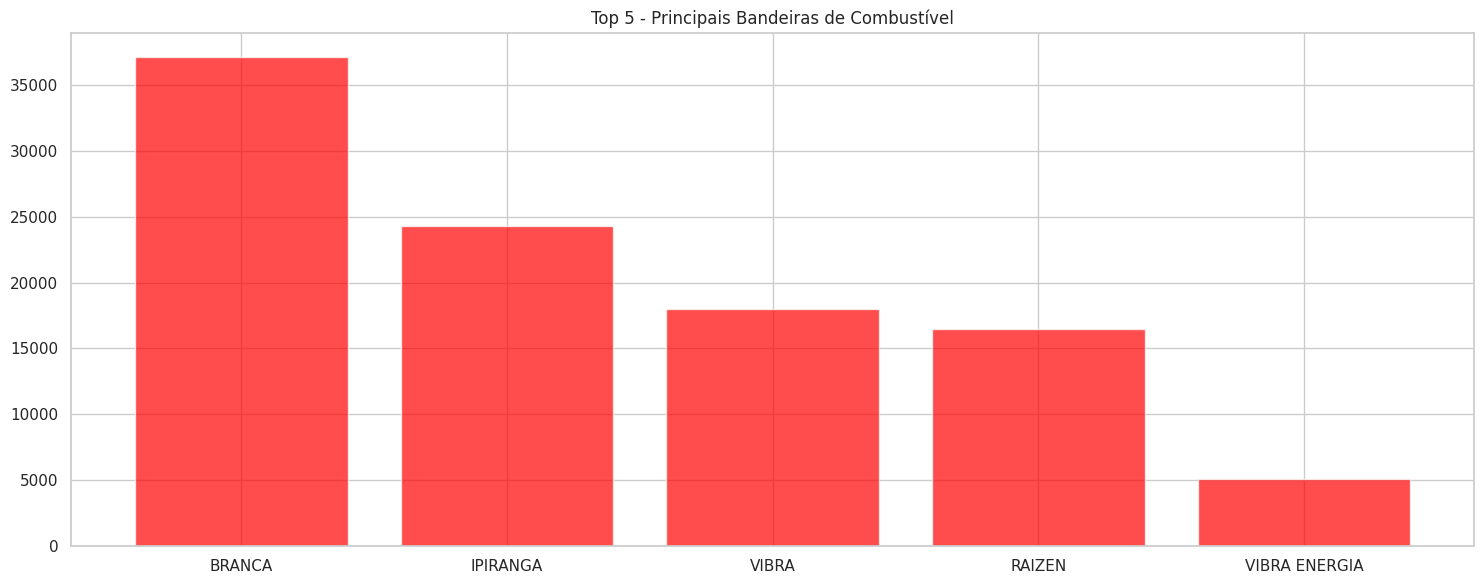

In [ ]:
# Criando gráfico
top_bandeiras = bandeira.head(5)
plt.figure(figsize=(15, 6))
plt.bar(top_bandeiras.index, top_bandeiras['Frequência'], color='red', alpha=0.7)
plt.title('Top 5 - Principais Bandeiras de Combustível')
plt.tight_layout()
plt.show()

###Como podemos observar na tabela e também visulamente no gráfico acima, as chamadas **"Bandeiras Brancas"** que são os postos que não faz nenhuma parceria com uma grande distribuidora, ou seja, os que possui marca própria são a maioria no Brasil com mais de 35 mil postos, sendo 33,4% de todas as bandeiras desse DataSet. Em segundo lugar temos a bandeira Ipiranga com mais de 21 mil postos.

###- **Qual estado do Brasil tem mais postos de combustíveis?**

In [ ]:
estado_qtnd_postos = combustiveis['Estado - Sigla'].value_counts()
estado_porc_postos = round(combustiveis['Estado - Sigla'].value_counts(normalize=True) * 100, 1)
postos_estado = pd.DataFrame({
    'Frequência': estado_qtnd_postos,
    'Porcentagem (%)': estado_porc_postos
})
postos_estado.head()

,Frequência,Porcentagem (%)
SP,31761,28.7
MG,11819,10.7
RJ,8680,7.9
PR,7383,6.7
RS,7323,6.6


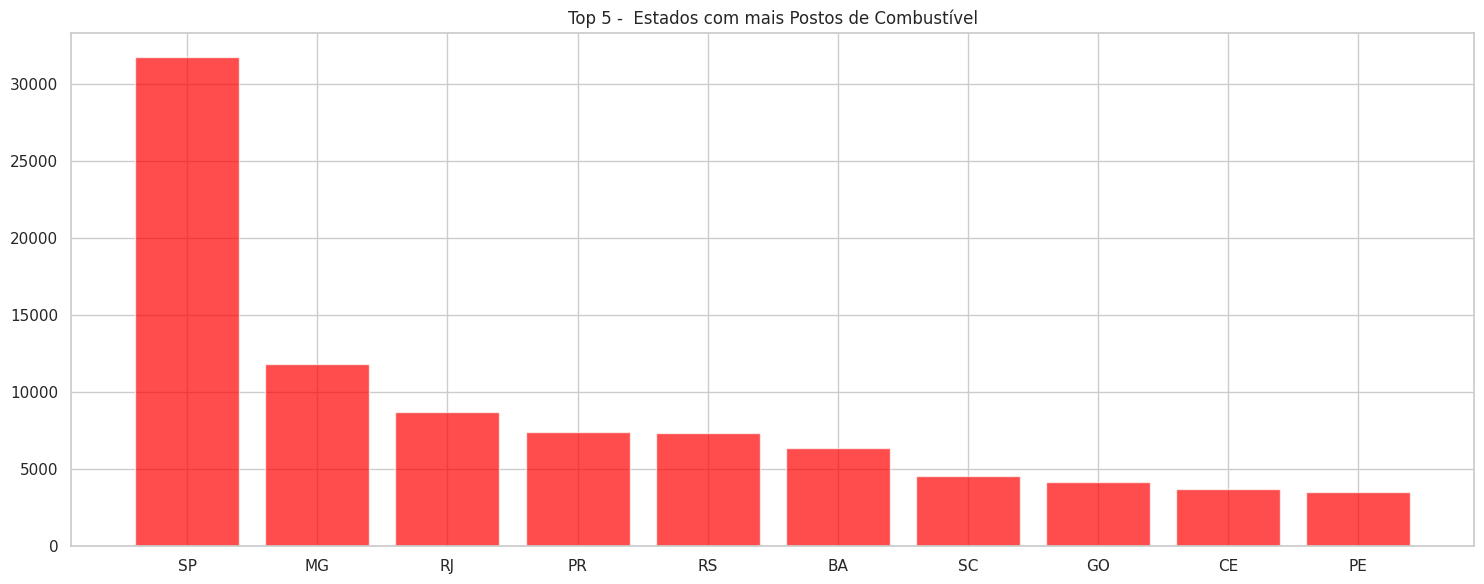

In [ ]:
top_postos = postos_estado.head(10)
plt.figure(figsize=(15, 6))
plt.bar(top_postos.index, top_postos['Frequência'], color='red', alpha=0.7)
plt.title('Top 5 -  Estados com mais Postos de Combustível')
plt.tight_layout()
plt.show()

###Com mais de **30 mil postos de combutíveis o estado de São Paulo é o que mais tem postos de gasolina**, isso representa 28,9% de todos os postos do Brasil. Em seguida vem **Minas Gerais e Rio de Janeiro com 10,8% e 7,8% respectivamente**. São Paulo também é lider quando se trata no total de automóveis circulando, possui uma frota com mais de 9 Milhões de automóveis, o que de fato reflete no gráfico acima.


# <font color = red> A análise exploratória dos dados revela insights valiosos sobre os preços dos combustíveis no Brasil:

## 1. **Tendências de Preços no Etanol**: Durante o mês de julho, o preço do etanol mostrou uma tendência de queda leve. No entanto, quando entramos no mês de agosto, houve uma queda mais acentuada, seguida de algumas flutuações significativas. Essa variação pode ser influenciada por fatores sazonais, disponibilidade de matéria-prima e demanda.

## 2. **Gasolina e Gasolina Aditivada**: Os preços da gasolina e da gasolina aditivada se mantiveram próximos um do outro, com uma leve queda em julho e um aumento em agosto. Essa proximidade de preços sugere uma forte correlação entre esses dois tipos de combustível.

## 3. **Preços Médios Próximos**: Os preços médios dos combustíveis permaneceram próximos durante esses dois meses. Tanto a gasolina comum quanto a gasolina aditivada tiveram um aumento de R$ 0,10 centavos, enquanto o etanol teve uma queda de R$ 0,14 centavos. Essa análise destaca a estabilidade dos preços em geral.

## 4. **Ranking dos Estados com Preços Mais Altos**: Os estados da região Norte do Brasil, como Acre, Amazonas, Rondônia, Ceará e Bahia, apresentam os preços médios mais altos de combustíveis. Isso é atribuído a fatores como distância dos centros de distribuição e dificuldades logísticas. Isso sugere a necessidade de medidas para tornar o combustível mais acessível nessas regiões.

## 5. **Regiões com Diferenças de Preços**: Os estados mais próximos à costa tendem a ter preços médios mais baixos devido à proximidade com os centros de produção e importação de combustíveis. O estado do Amapá se destaca por ter a menor média de preço de gasolina, mas o etanol mais caro.

## 6. **Municípios com Menores Preços**: Todos os municípios com os preços mais baixos de combustíveis estão localizados no estado de São Paulo. Isso pode ser atribuído a fatores como carga tributária mais baixa, produção de cana-de-açúcar e concentração de refinarias.

## 7. **Municípios com Maiores Preços**: Tefe, no estado do Amazonas, destaca-se como o município com a Gasolina Aditivada mais cara do Brasil. Cruzeiro do Sul, no Acre, é o município com o Etanol mais caro, e Tefe também lidera com a Gasolina mais cara. A distância dos centros de distribuição é um fator que contribui para esses altos preços.

## 8. **Variações Regionais**: O gráfico de calor revela que a região Norte e a região Nordeste apresentam uma correlação mais fraca entre os preços do etanol. Isso sugere que fatores diferentes podem estar influenciando os preços do etanol nessas duas regiões.

## 9. **Influência das Bandeiras dos Postos**: A presença de postos de bandeira branca (sem parceria com grandes distribuidoras) é predominante no Brasil, representando 33,4% de todos os postos. Isso cria um cenário competitivo que pode influenciar nos preços dos combustíveis.

## 10. **Frota de Automóveis e Postos em São Paulo**: O estado de São Paulo lidera em termos de número de postos de combustível, com 28,9% de todos os postos no Brasil. Isso está correlacionado com a grande frota de automóveis no estado, que é a maior do país.

##  <font color = red>  Essa análise exploratória fornece insights importantes para entender os preços dos combustíveis no Brasil, destacando a importância de fatores como localização geográfica, logística e concorrência no mercado de combustíveis.
